In [161]:
import numpy as np
import pandas as pd
import glob
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
wnominate6_2d = pd.read_csv(os.path.join('Results','EP6','wnominate6.csv'))
wnominate7_2d = pd.read_csv(os.path.join('Results','EP7','wnominate7.csv'))
wnominate8_2d = pd.read_csv(os.path.join('Results','EP8','wnominate8.csv'))



In [163]:
wnominate6_2d_flipped = wnominate6_2d.copy() 

In [164]:
wnominate6_2d_flipped['coord2D'] = wnominate6_2d['coord2D']*(-1)
wnominate6_2d_flipped['coord1D'] = wnominate6_2d['coord1D']*(-1)

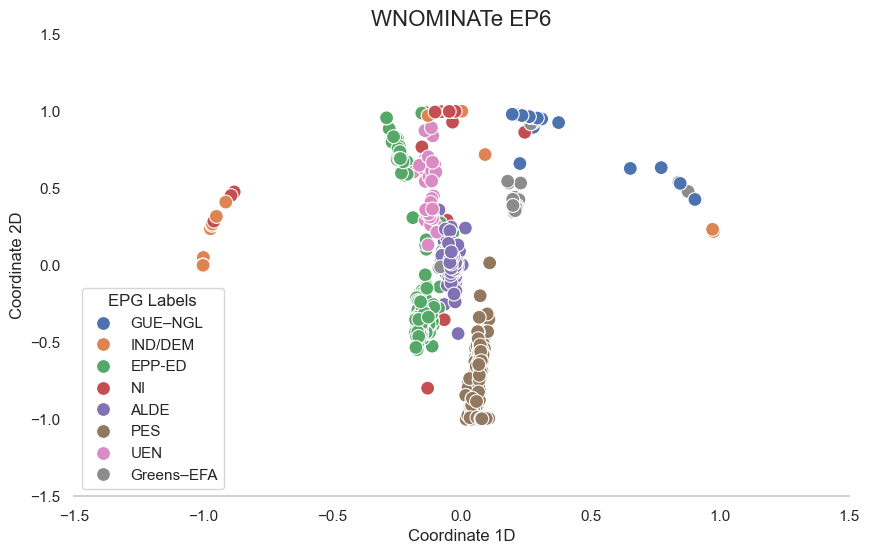

In [165]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnominate6_2d, x='coord1D', y='coord2D', hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title(f'WNOMINATe EP6', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

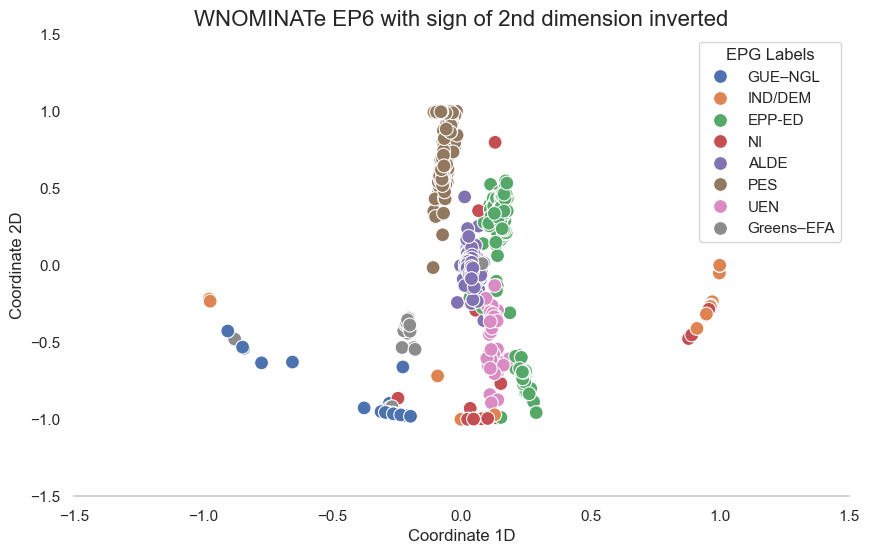

In [166]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnominate6_2d_flipped, x='coord1D', y='coord2D', hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title(f'WNOMINATe EP6 with sign of 2nd dimension inverted', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

In [167]:
def wnominate (df):    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df, x='coord1D', y='coord2D', hue='EPG', s=100)
    
    plt.xlabel("Coordinate 1")
    plt.ylabel("Coordinate 2")
    
    # Apply minimal theme
    sns.set(style="whitegrid")
    
    # Add legend
    plt.legend(title="EPG labels",loc='lower right', bbox_to_anchor=(1.01, -0.005), ncol=1)
    plt.savefig(os.path.join("Graphs", "WNOMINATEflipped2d.png"), dpi=300)

    # Show plot
    plt.show()

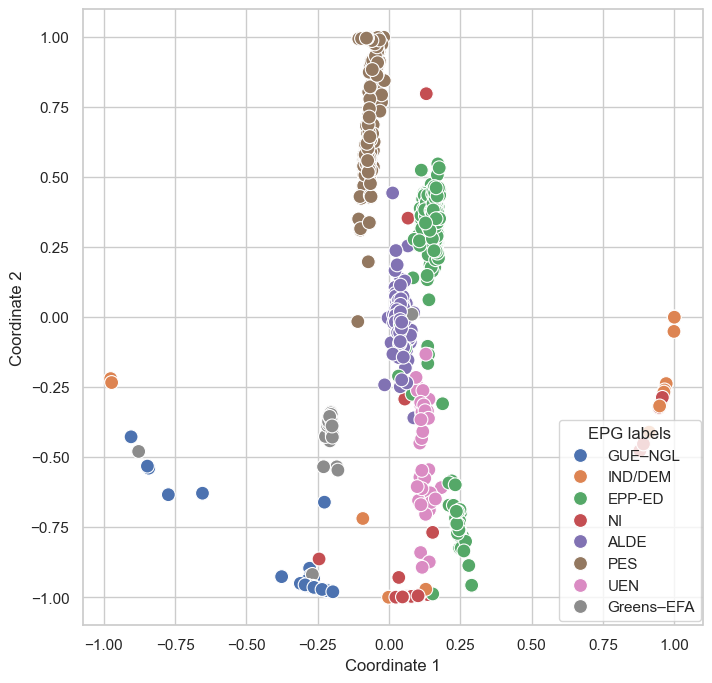

In [168]:
wnominate(wnominate6_2d_flipped)

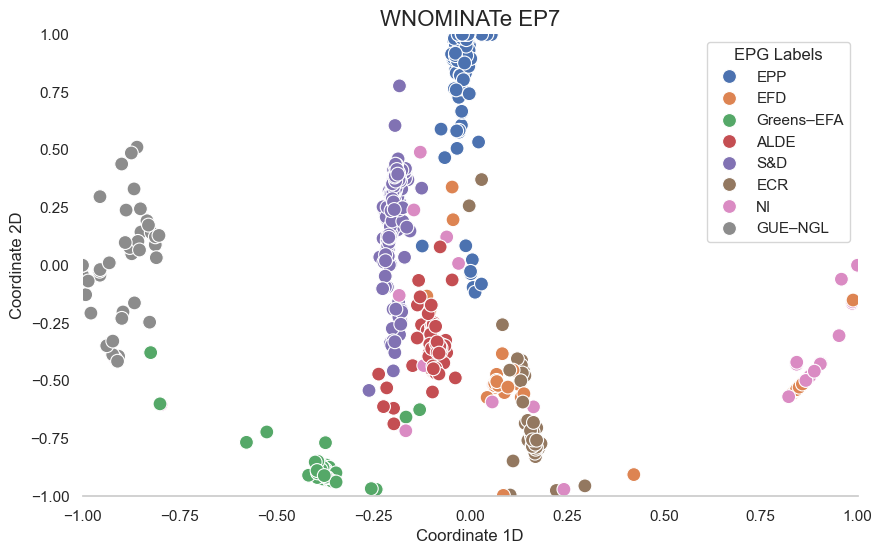

In [169]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnominate7_2d, x='coord1D', y='coord2D', hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'WNOMINATe EP7', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

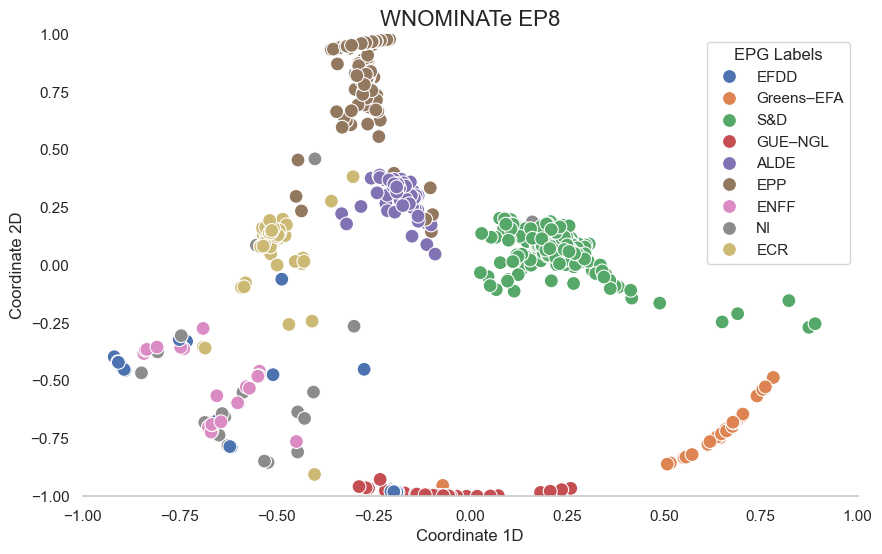

In [170]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnominate8_2d, x='coord1D', y='coord2D', hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'WNOMINATe EP8', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

In [171]:
wnominate6_1d = pd.read_csv(os.path.join('Results','EP6','wnominate61d.csv'))
wnominate7_1d = pd.read_csv(os.path.join('Results','EP7','wnominate71d.csv'))
wnominate8_1d = pd.read_csv(os.path.join('Results','EP8','wnominate81d.csv'))

In [172]:
def extract_iters (ep):
    file_pattern = f'Results/EP{ep}/EP{ep}_Ideal_points_emIRT_Iteration*.csv'
    
    # Use glob to list all files matching the pattern
    file_list = glob.glob(file_pattern)
    
    # Initialize an empty list to hold the DataFrames
    df_list = []
    
    for file in file_list:
        df = pd.read_csv(file)
        column = df[f'EPG....EPG{ep}']
        names = df[f'MepId....names{ep}']
        df = df['d1']
        
        df_list.append(df)
    
    combined_df = pd.concat(df_list, axis=0)
    
    # Calculate the average across the DataFrames
    average_df = combined_df.groupby(combined_df.index).mean()
    column = column.reset_index(drop=True)
    names = names.reset_index(drop=True)
    average_df = average_df.reset_index(drop=True)
    
    final_df = pd.concat([names, column, average_df], axis=1)
    
    final_df.columns = ['MepId','EPG', 'Average_position']
    return final_df

In [173]:
avg6 = extract_iters(6)
avg7 = extract_iters(7)
avg8 = extract_iters(8)
avg9 = extract_iters(9)

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

avg8_scaled = avg8.copy()
avg8_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(avg8['Average_position']))
avg6_scaled = avg6.copy()
avg6_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(avg6['Average_position']))
avg7_scaled = avg7.copy()
avg7_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(avg7['Average_position']))
avg9_scaled = avg9.copy()
avg9_scaled['coord1D']= scaler.fit_transform(pd.DataFrame(avg9['Average_position']))

In [175]:
from sklearn.preprocessing import MinMaxScaler


In [252]:
emIRT8_eigenstarts = pd.read_csv(os.path.join('Results', 'EP8', 'emIRT_EP8_eigenstarts.csv'))
emIRT8_eigenstarts_scaled = emIRT8_eigenstarts.copy()
emIRT8_eigenstarts_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(emIRT8_eigenstarts['d1']))
emIRT8_eigenstarts_scaled['EPG'] = emIRT8_eigenstarts_scaled['EPG....EPG8']
emIRT8_eigenstarts_scaled['EPG'] = emIRT8_eigenstarts_scaled['EPG'].fillna(0)
emIRT7_eigenstarts = pd.read_csv(os.path.join('Results', 'EP7', 'emIRT_EP7_eigenstarts.csv'))
emIRT7_eigenstarts_scaled = emIRT7_eigenstarts.copy()
emIRT7_eigenstarts_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(emIRT7_eigenstarts['d1']))
emIRT7_eigenstarts_scaled['EPG'] = emIRT7_eigenstarts_scaled['EPG....EPG7']

emIRT6_eigenstarts = pd.read_csv(os.path.join('Results', 'EP6', 'emIRT_EP6_eigenstartsXDATA1.csv'))
emIRT6_eigenstarts_scaled = emIRT6_eigenstarts.copy()
emIRT6_eigenstarts_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(emIRT6_eigenstarts['d1']))
emIRT6_eigenstarts_scaled['EPG'] = emIRT6_eigenstarts_scaled['EPG....EPG6']

emIRT9_eigenstarts = pd.read_csv(os.path.join('Results', 'EP9', 'emIRT_EP9_eigenstarts.csv'))
emIRT9_eigenstarts_scaled = emIRT9_eigenstarts.copy()
emIRT9_eigenstarts_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(emIRT9_eigenstarts['d1']))
emIRT9_eigenstarts_scaled['EPG'] = emIRT9_eigenstarts_scaled['EPG....EPG9']

In [177]:
emIRT8_eigenstarts_scaled

MepId....names8 EPG....EPG8        d1  y   coord1D         EPG
0       Lars ADAKTUSSON         NaN  0.052976  0  0.100024         NaN
1     Isabella ADINOLFI        EFDD -0.147501  0 -0.685696        EFDD
2        Marco AFFRONTE  Greens–EFA -0.132778  0 -0.627993  Greens–EFA
3            Laura AGEA        EFDD -0.145481  0 -0.677776        EFDD
4     John Stuart AGNEW        EFDD -0.161929  0 -0.742241        EFDD
..                  ...         ...       ... ..       ...         ...
853  Aleksejs LOSKUTOVS         NaN  0.121928  0  0.370261         NaN
854        Ralph PACKET         NaN -0.015429  0 -0.168072         NaN
855    Kārlis ŠADURSKIS         NaN  0.153988  0  0.495914         NaN
856      Bogusław SONIK         NaN  0.155572  0  0.502120         NaN
857      Babette WINTER         NaN -0.042454  0 -0.273989         NaN

[858 rows x 6 columns]

In [178]:
import scipy.stats as stats


In [179]:
def wnominate_scatter (wnominate,avg,number):    
    avg = avg.drop(columns='EPG')

    avg = avg.add_suffix("avg_")

    df = wnominate.join(avg)
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df, x='coord1Davg_', y='coord1D', s=100)
    df = df.dropna(subset=['coord1Davg_', 'coord1D'])
    corr_coef, p_value = stats.pearsonr(np.array(df['coord1Davg_']), np.array(df['coord1D']))
    print("Correlation Coefficient:", corr_coef)
    print("P-value:", p_value)
    plt.xlabel("emIRT estimate", fontsize = 25)
    plt.ylabel("W-NOMINATE estimate",fontsize = 25)
    plt.text(
    0.05, 0.95,  
    f"Pearson coefficient = {corr_coef:.3f}",
    ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
    )        
    
    plt.savefig(os.path.join("Graphs", f"ScatterWNOMINATE_{number}.png"), dpi=300)



In [180]:
wnominate8_1d['EPG'] = wnominate8_1d['EPG'].fillna(0)


Correlation Coefficient: 0.6500172198830212
P-value: 5.673804324634018e-103


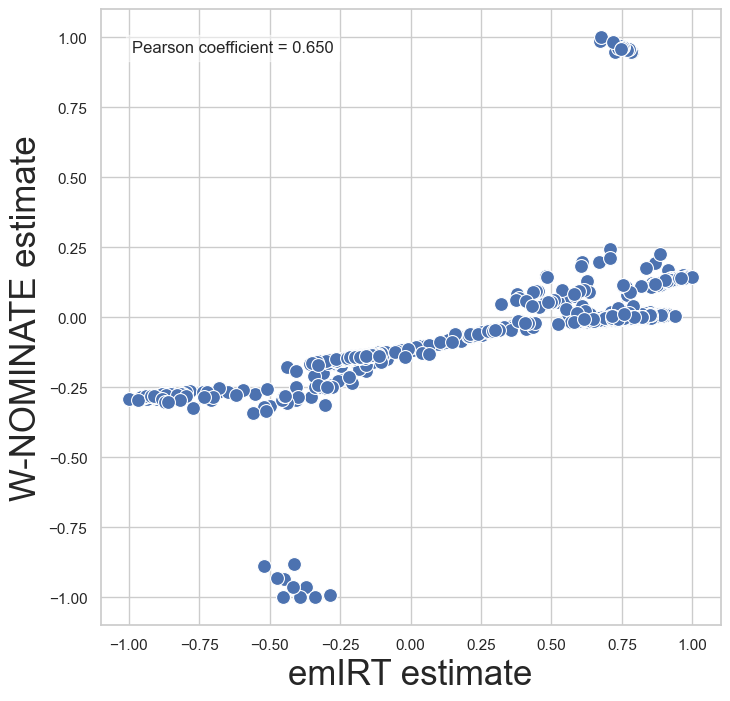

In [181]:
wnominate_scatter(wnominate7_1d, avg7_scaled, 7)


In [182]:
def wnominate_scatter2(wnominate, avg, number):
    # Join the datasets on their indices or a common column
    avg = avg.drop(columns='EPG')
    avg = avg.add_suffix("avg_")
    
    df = wnominate.join(avg)
    print(df.head(5))
    sns.set(style="whitegrid")
    
    # Get the unique EPG values
    unique_epg_values = df['EPG'].unique()
    
    # Loop through each unique EPG value and create a plot for each
    for epg_value in unique_epg_values:
        # Filter the data for the current EPG value
        df_subset = df[df['EPG'] == epg_value].dropna(subset=['coord1Davg_', 'coord1D'])
        
        plt.figure(figsize=(8, 8))
        
        # Create scatter plot
        sns.scatterplot(data=df_subset, x='coord1Davg_', y='coord1D', s=100)
        
        # Calculate Pearson correlation coefficient for the subset
        corr_coef, p_value = stats.pearsonr(df_subset['coord1Davg_'].values, df_subset['coord1D'].values)
        print(f"EPG: {epg_value} - Correlation Coefficient:", corr_coef)
        print(f"EPG: {epg_value} - P-value:", p_value)
        
        # Set labels and title
        plt.xlabel("emIRT estimate",fontsize = 25)
        plt.ylabel("W-NOMINATE estimate", fontsize = 25)
        plt.title(f"Scatter Plot for EPG: {epg_value}", fontsize = 25)

        # Display correlation and p-value on the plot
        plt.text(
            0.05, 0.95,
            f"Pearson coefficient= {corr_coef:.3f}",
            ha='left', va='top', transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.5)
        )
        
        # Save the plot with a unique filename for each EPG value
        plt.savefig(os.path.join("Graphs", f"ScatterEMWNOMINATE_{number}_EPG_{epg_value}.png"), dpi=300)
        
        # Show the plot
        plt.show()

          EPG   coord1D          MepIdavg_  Average_positionavg_  coord1Davg_
0           0  0.044779    Lars ADAKTUSSON              2.445893     0.432075
1        EFDD -0.862034  Isabella ADINOLFI             -4.094120    -0.531684
2  Greens–EFA -0.662883     Marco AFFRONTE             -4.801999    -0.636000
3        EFDD -0.854416         Laura AGEA             -4.140657    -0.538542
4        EFDD  0.916955  John Stuart AGNEW              0.855238     0.197671
EPG: 0 - Correlation Coefficient: 0.6425710873257408
EPG: 0 - P-value: 2.541133804863729e-13


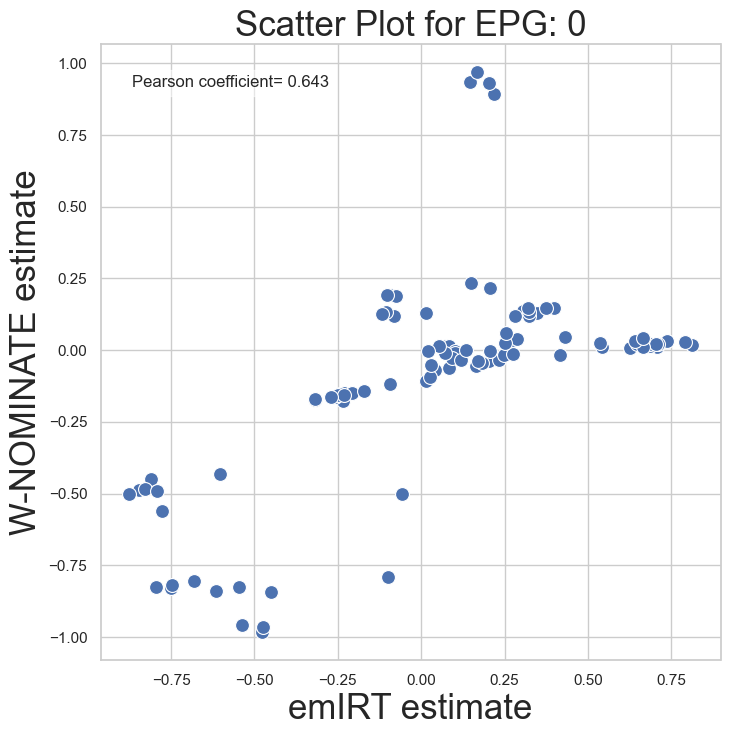

EPG: EFDD - Correlation Coefficient: 0.9685225915062703
EPG: EFDD - P-value: 8.998977951380151e-26


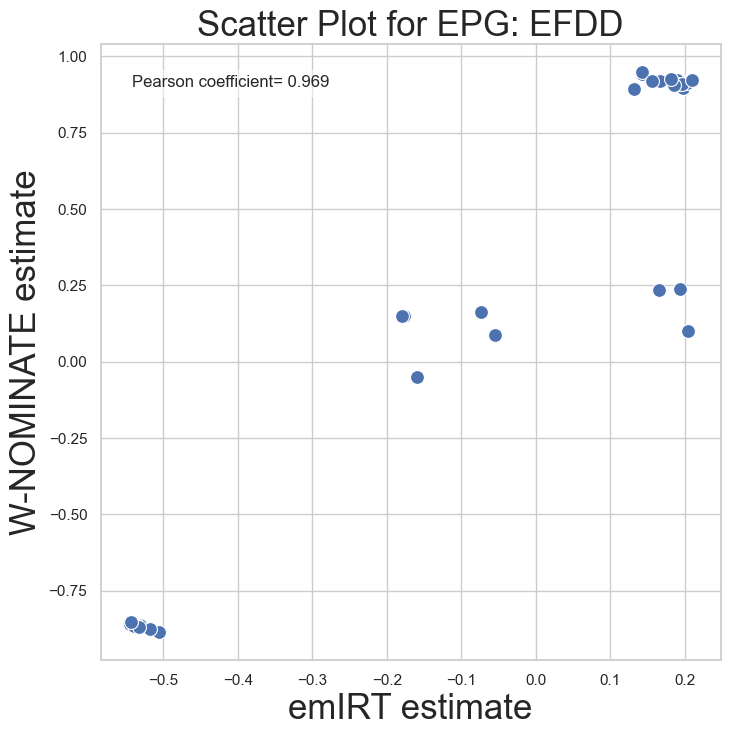

EPG: Greens–EFA - Correlation Coefficient: -0.10193352591451964
EPG: Greens–EFA - P-value: 0.4721033984355808


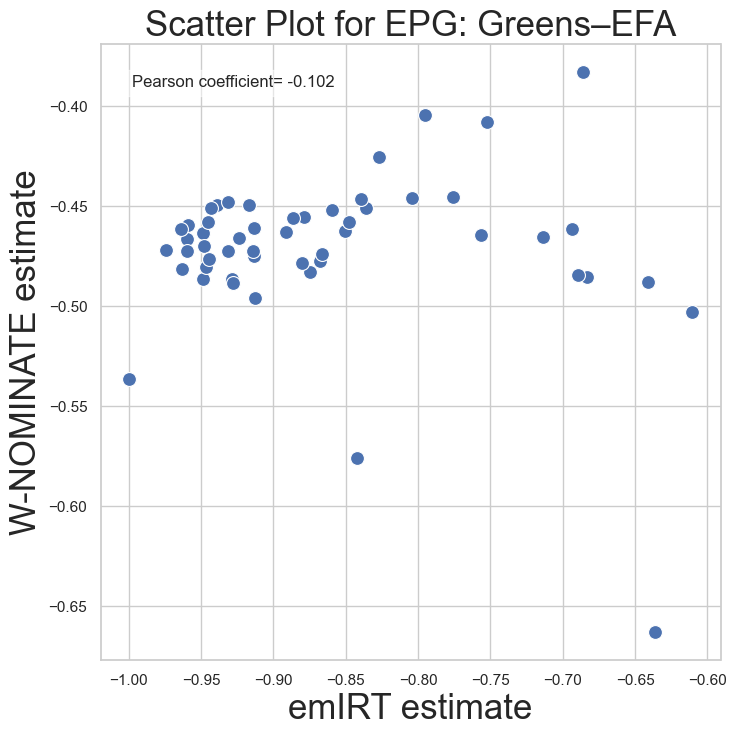

EPG: S&D - Correlation Coefficient: 0.9628351354031557
EPG: S&D - P-value: 1.1050693211822262e-107


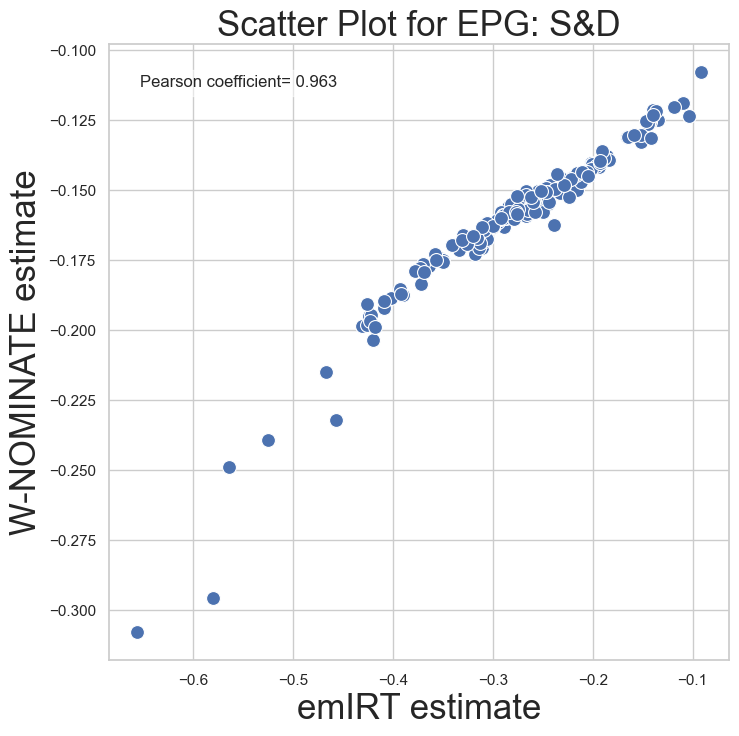

EPG: GUE–NGL - Correlation Coefficient: -0.9388947950923011
EPG: GUE–NGL - P-value: 2.4258675901376615e-24


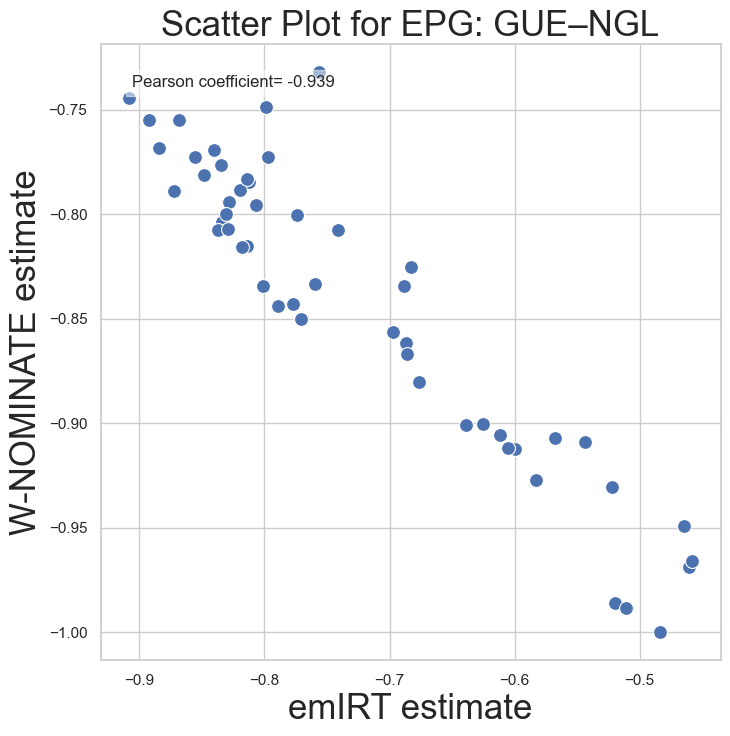

EPG: ALDE - Correlation Coefficient: 0.8440691182225457
EPG: ALDE - P-value: 1.5812890158573478e-19


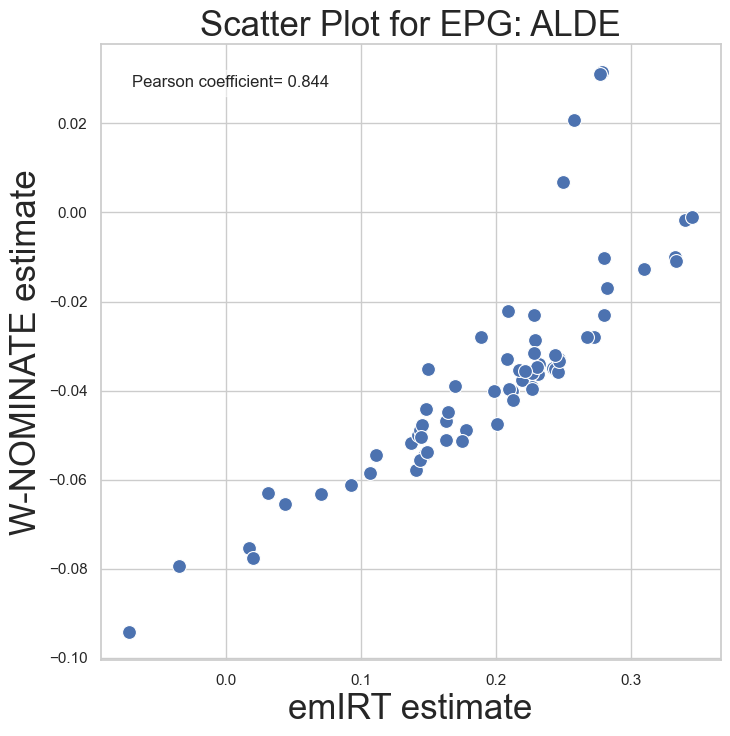

EPG: EPP - Correlation Coefficient: 0.549024395971118
EPG: EPP - P-value: 1.2191682038883935e-18


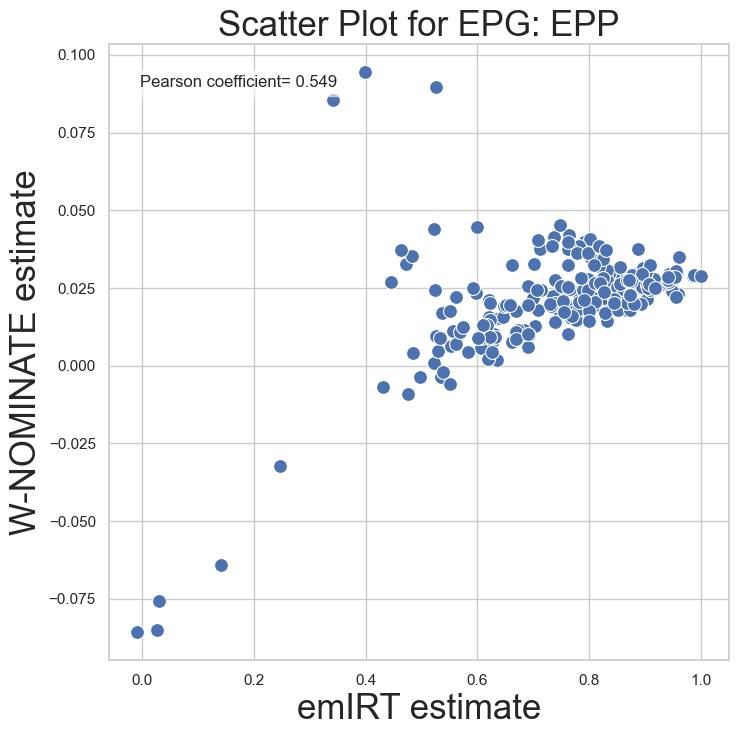

EPG: ENFF - Correlation Coefficient: 0.7251587915611125
EPG: ENFF - P-value: 8.335089410529225e-07


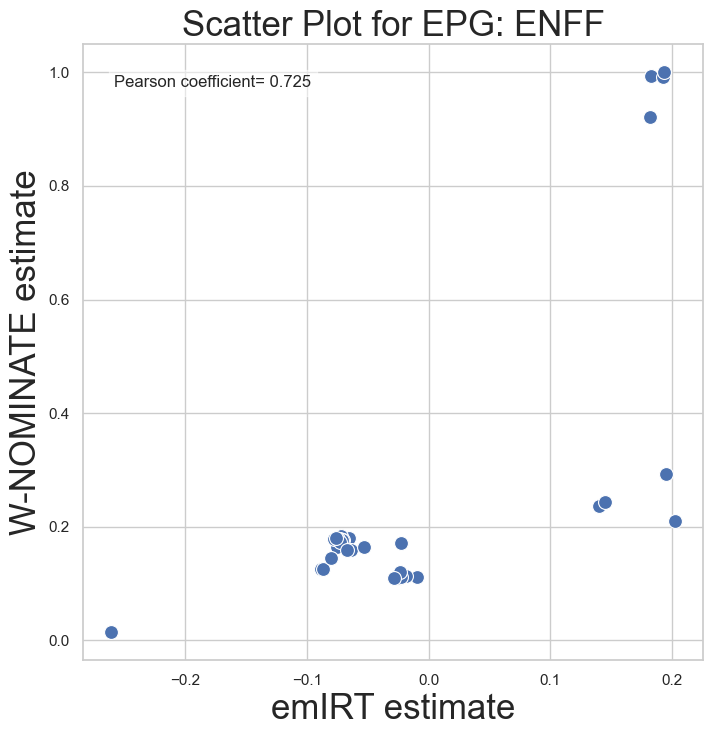

EPG: NI - Correlation Coefficient: 0.4992687546792551
EPG: NI - P-value: 0.015290515269534101


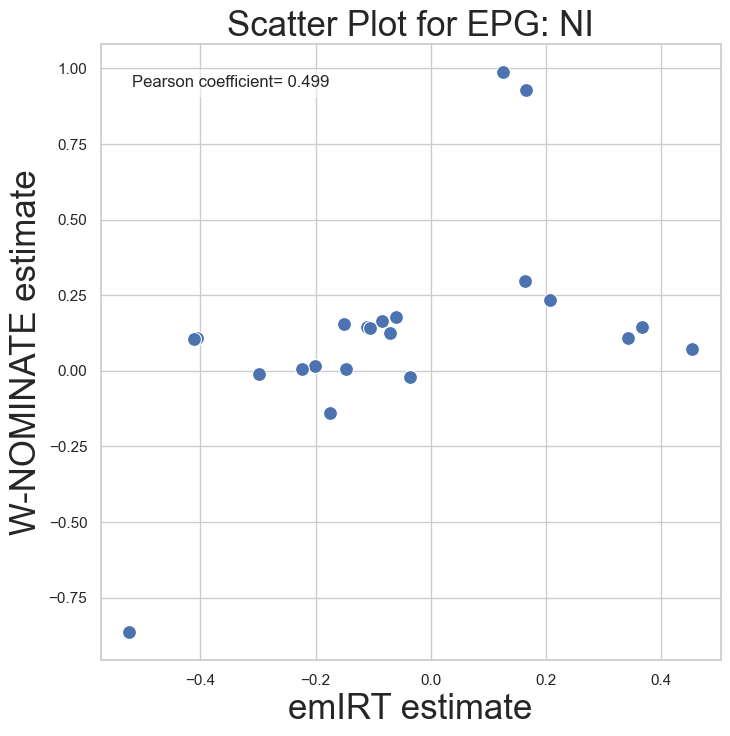

EPG: ECR - Correlation Coefficient: 0.4537515197734325
EPG: ECR - P-value: 6.252050352555607e-05


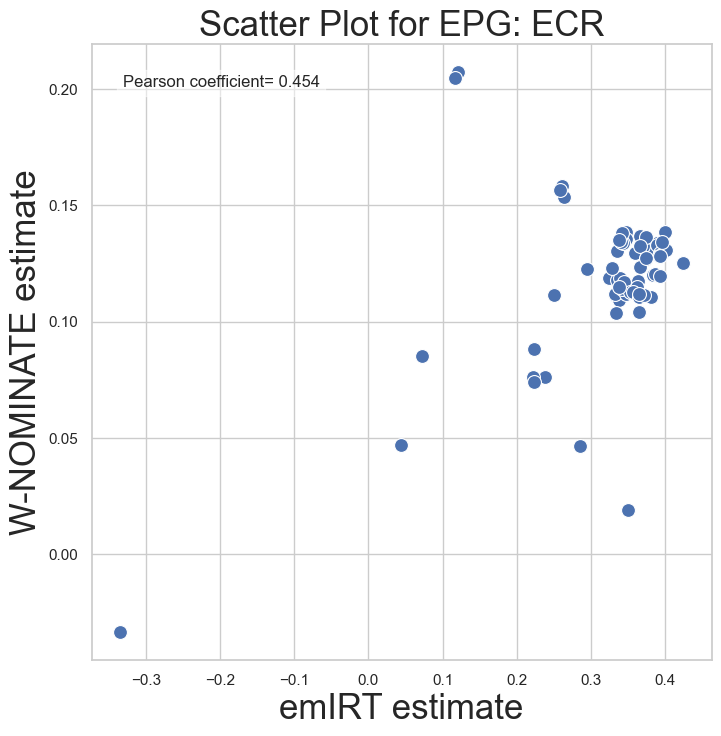

In [183]:
wnominate_scatter2(wnominate8_1d, avg8_scaled, '8')

Correlation Coefficient: 0.927742527182317
P-value: 0.0


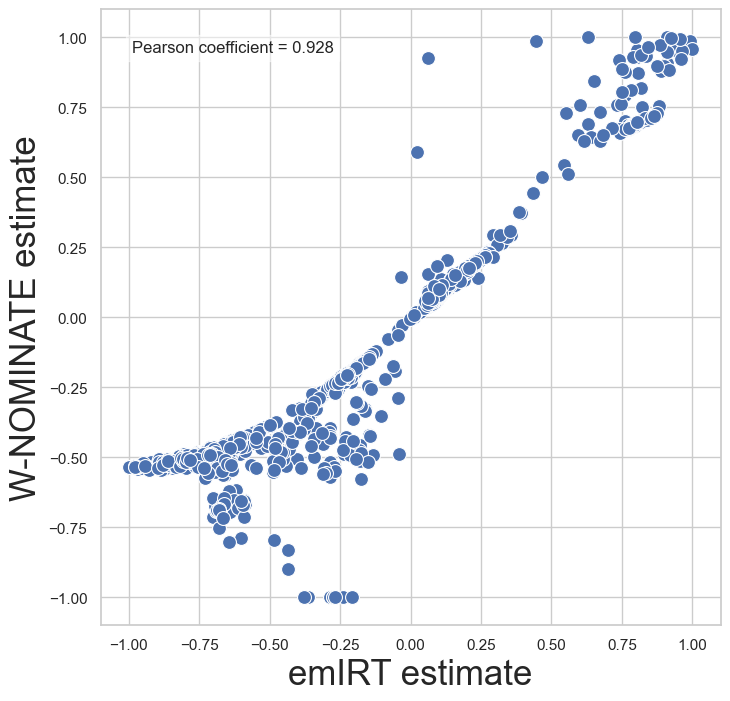

In [184]:
wnominate_scatter(wnominate6_1d,avg6_scaled,6)

          EPG   coord1D             MepIdavg_  Average_positionavg_  \
0         EPP -0.005895           Damien ABAD              2.253332   
1         EPP  0.004267            János ÁDER              2.649164   
2         EFD  0.948548     John Stuart AGNEW              2.936203   
3         EPP  0.005754    Gabriele ALBERTINI              3.084280   
4  Greens–EFA -0.278829  Jan Philipp ALBRECHT             -6.563521   

   coord1Davg_  
0     0.668235  
1     0.737452  
2     0.787645  
3     0.813538  
4    -0.873514  
EPG: EPP - Correlation Coefficient: 0.5626479027175587
EPG: EPP - P-value: 1.573798842659257e-26


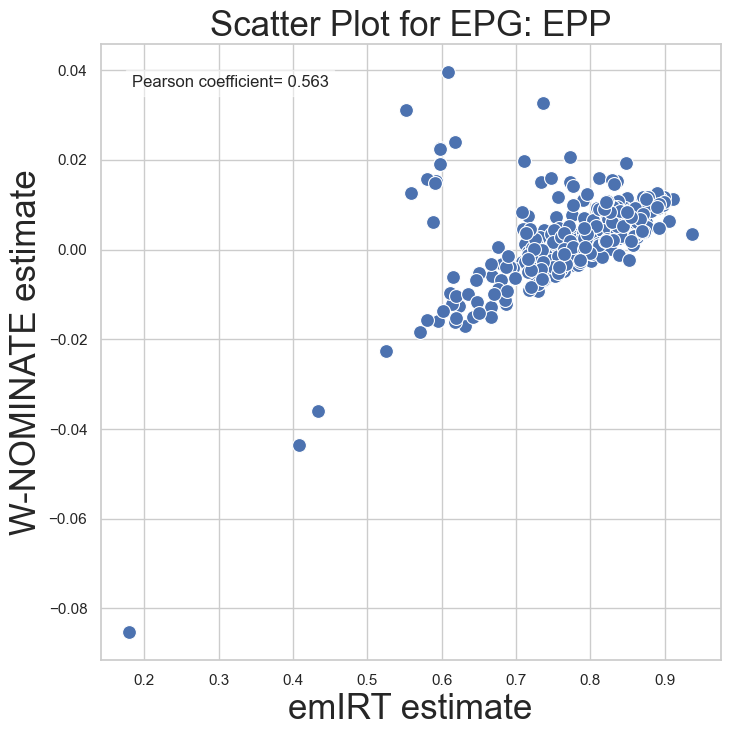

EPG: EFD - Correlation Coefficient: 0.6564899366263197
EPG: EFD - P-value: 4.4978777788162634e-05


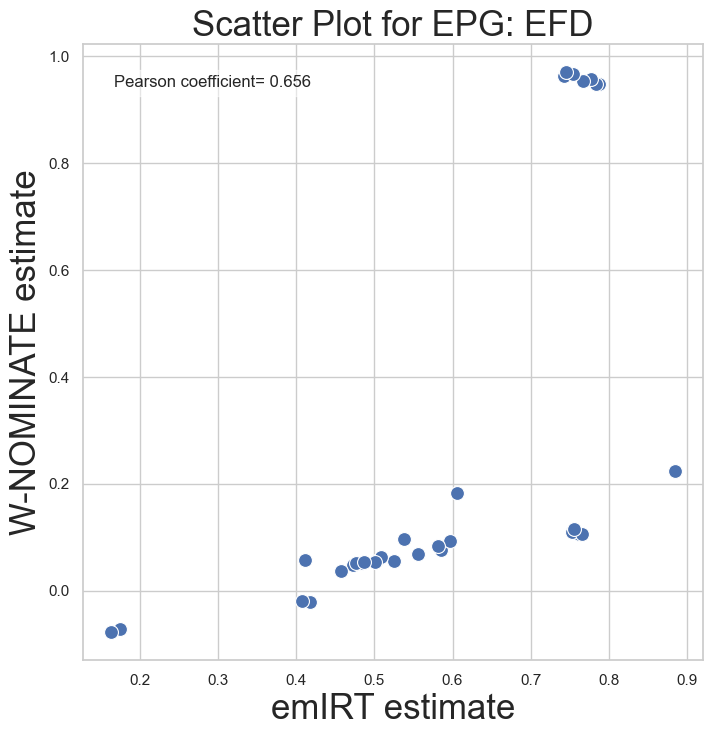

EPG: Greens–EFA - Correlation Coefficient: 0.798425226811632
EPG: Greens–EFA - P-value: 9.76711688601724e-16


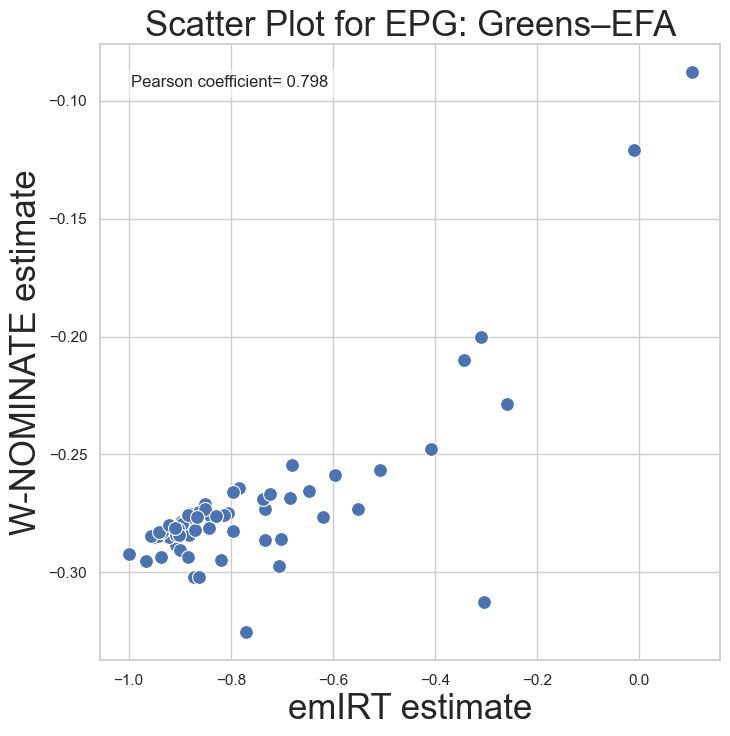

EPG: ALDE - Correlation Coefficient: 0.9947107884388686
EPG: ALDE - P-value: 9.600734984593425e-92


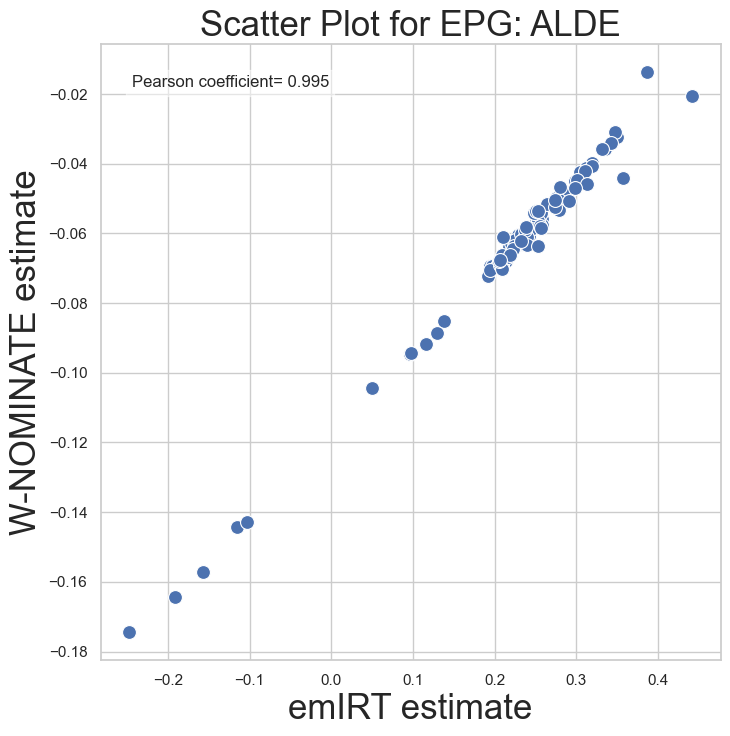

EPG: S&D - Correlation Coefficient: 0.9295619814093068
EPG: S&D - P-value: 1.4399013342230844e-95


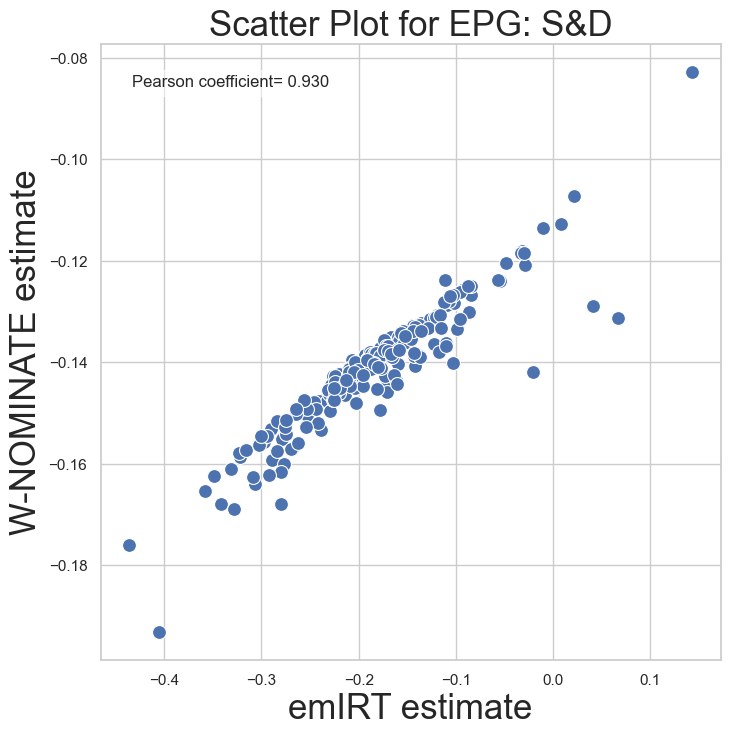

EPG: ECR - Correlation Coefficient: 0.7679435841027323
EPG: ECR - P-value: 3.1514224029686297e-12


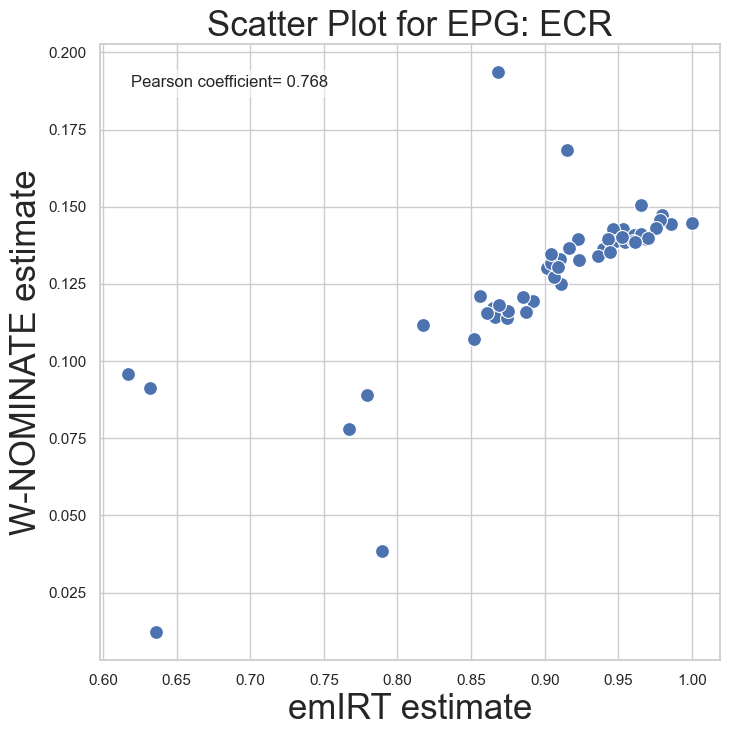

EPG: NI - Correlation Coefficient: 0.7398678324928583
EPG: NI - P-value: 1.67240179588617e-07


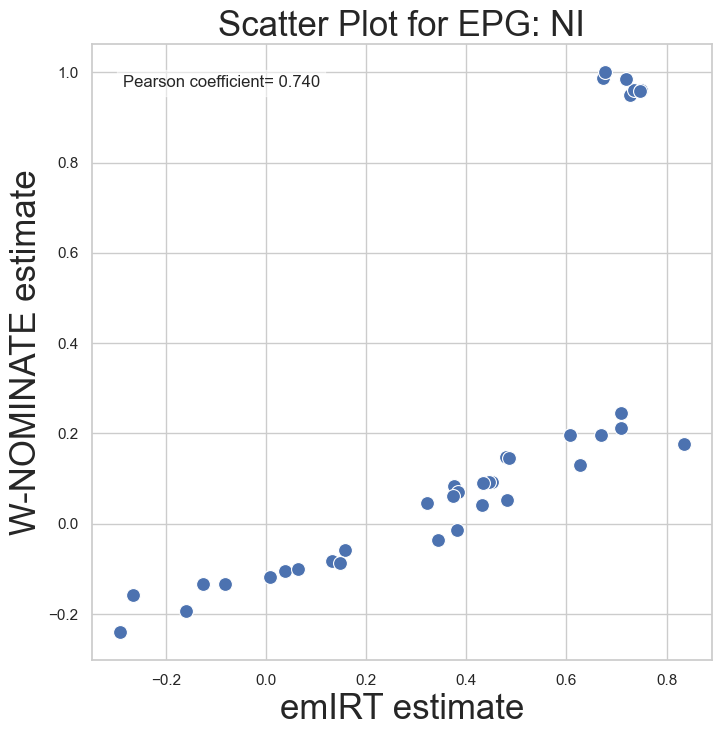

EPG: GUE–NGL - Correlation Coefficient: 0.4341108111523181
EPG: GUE–NGL - P-value: 0.003238213120303611


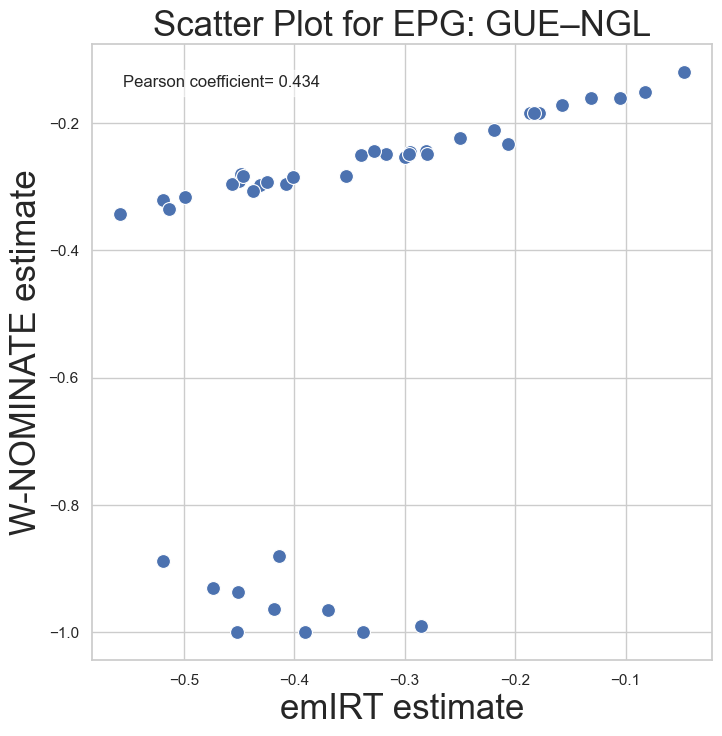

In [185]:
wnominate_scatter2(wnominate7_1d, avg7_scaled, '7')

Correlation Coefficient: 0.6121049329735099
P-value: 7.815278149445028e-89


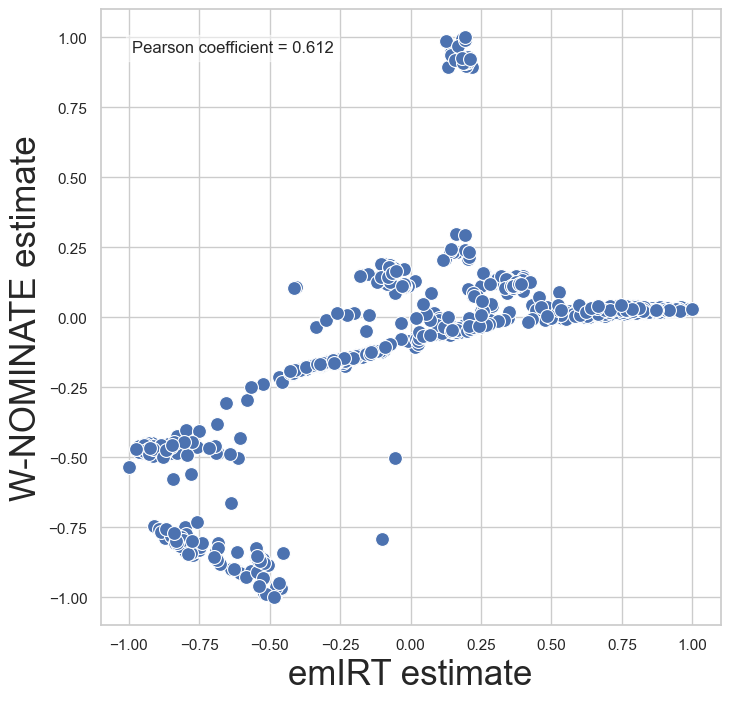

In [186]:
wnominate_scatter(wnominate8_1d,avg8_scaled,8)

Correlation Coefficient: 0.6500172198830212
P-value: 5.673804324634018e-103


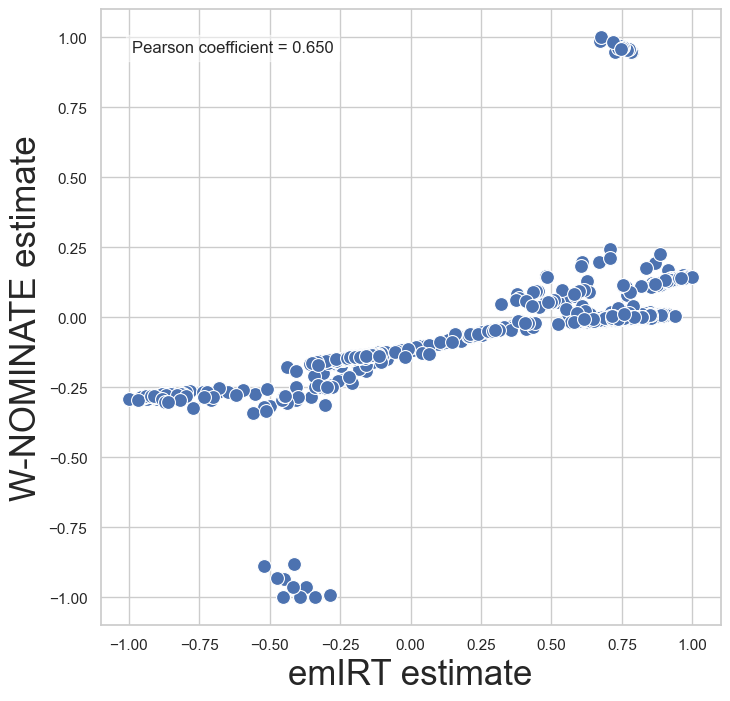

In [187]:
wnominate_scatter(wnominate7_1d,avg7_scaled,7)

Correlation Coefficient: 0.26514097227652683
P-value: 3.4419707510276393e-15


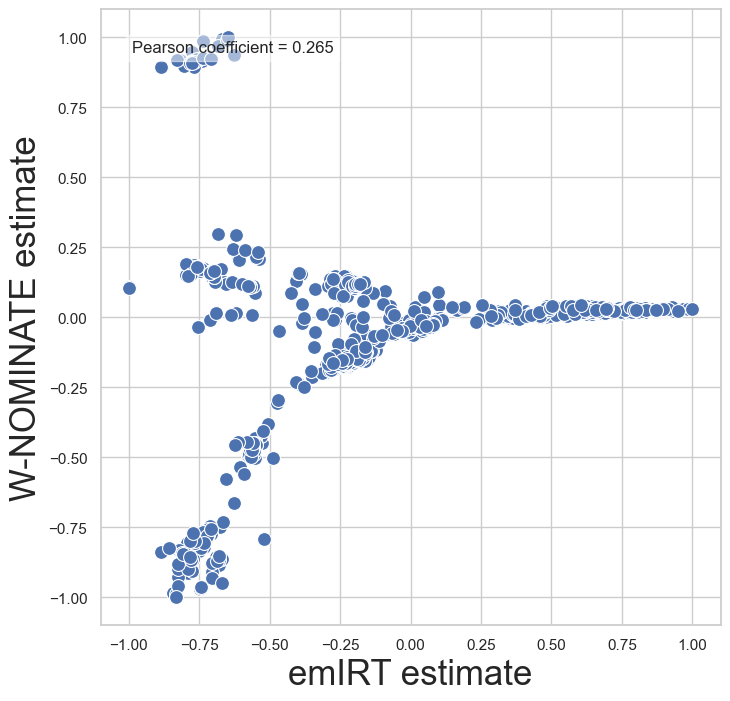

In [188]:
wnominate_scatter(wnominate8_1d,emIRT8_eigenstarts_scaled,8)

Correlation Coefficient: 0.7159155892312175
P-value: 3.8265224681969465e-134


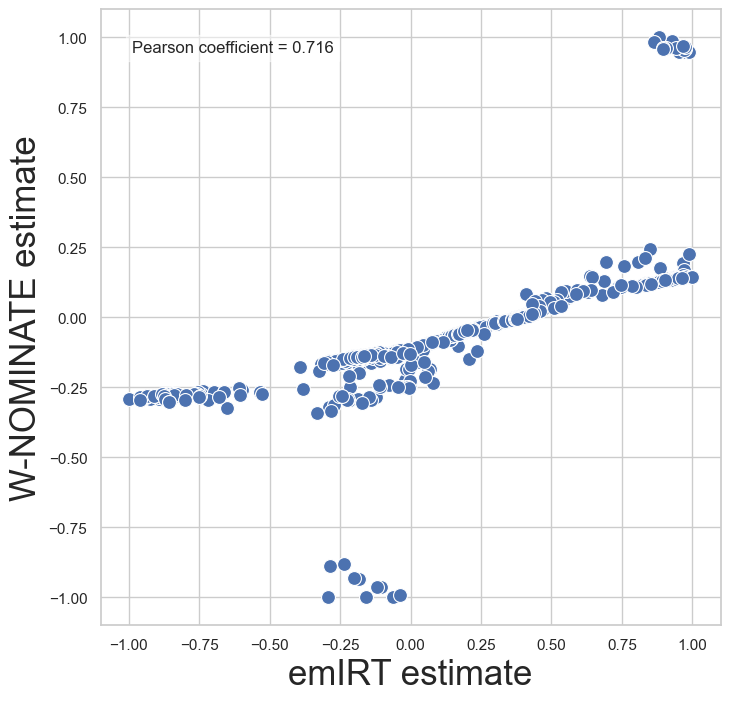

In [260]:
wnominate_scatter(wnominate7_1d,emIRT7_eigenstarts_scaled,7)


In [189]:
def emscatter (avg,eigen,number):
        
    df = eigen.join(avg,rsuffix="y",lsuffix="x")
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df, x="coord1Dx", y="coord1Dy", s=100)
    corr_coef, p_value = stats.pearsonr(np.array(df["coord1Dx"]), np.array(df["coord1Dy"]))
    print("Correlation Coefficient:", corr_coef)
    print("P-value:", p_value)
    plt.xlabel("emIRT estimate",fontsize = 20)
    plt.ylabel("emIRT estimate with starting points of W-NOMINATE",fontsize = 20)
    plt.text(
    0.05, 0.95,  
    f"Pearson coefficient = {corr_coef:.3f}",
    ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
        
    )
    plt.savefig(os.path.join("Graphs", f"ScatterEMEIGEN{number}.png"), dpi=300)

    # Show plot
    plt.show()

In [258]:
def emscatter2(avg, eigen, number):
    # Join the datasets on their indices or a common column with appropriate suffixes
    df = eigen.join(avg, rsuffix="y", lsuffix="x")
    print(df.head(5))
    
    sns.set(style="whitegrid")
    
    # Get the unique EPG values from the joined dataframe
    unique_epg_values = df['EPGy'].unique()
    
    for epg_value in unique_epg_values:
        # Filter the data for the current EPG value and drop any rows with NaNs in key columns
        df_subset = df[df['EPGy'] == epg_value].dropna(subset=['coord1Dx', 'coord1Dy'])
        
        plt.figure(figsize=(8, 8))
        
        # Create scatter plot
        sns.scatterplot(data=df_subset, x="coord1Dx", y="coord1Dy", s=100)
        
        # Calculate Pearson correlation coefficient for the subset
        try:
            corr_coef, p_value = stats.pearsonr(df_subset['coord1Dx'].values, df_subset['coord1Dy'].values)
        except ValueError:
            corr_coef, p_value = 0 ,0
        print(f"EPG: {epg_value} - Correlation Coefficient:", corr_coef)
        print(f"EPG: {epg_value} - P-value:", p_value)
        
        # Set labels and title
        plt.xlabel("emIRT estimate", fontsize=25)
        plt.ylabel("emIRT estimate with starting points of W-NOMINATE", fontsize=25)
        plt.title(f"Scatter Plot for EPG: {epg_value}", fontsize=25)

        # Display correlation coefficient on the plot
        plt.text(
            0.05, 0.95,
            f"Pearson coefficient = {corr_coef:.3f}",
            ha='left', va='top', transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.5)
        )
        
        # Save the plot with a unique filename for each EPG value
        plt.savefig(os.path.join("Graphs", f"ScatterEMEIGEN_{number}_EPG_{epg_value}.png"), dpi=300)
        
        # Show the plot
        plt.show()

In [190]:
df = emIRT8_eigenstarts_scaled.join(avg8_scaled,rsuffix="x",lsuffix="y")

In [191]:
df

MepId....names8 EPG....EPG8        d1  y  coord1Dy        EPGy  \
0       Lars ADAKTUSSON         NaN  0.052976  0  0.100024         NaN   
1     Isabella ADINOLFI        EFDD -0.147501  0 -0.685696        EFDD   
2        Marco AFFRONTE  Greens–EFA -0.132778  0 -0.627993  Greens–EFA   
3            Laura AGEA        EFDD -0.145481  0 -0.677776        EFDD   
4     John Stuart AGNEW        EFDD -0.161929  0 -0.742241        EFDD   
..                  ...         ...       ... ..       ...         ...   
853  Aleksejs LOSKUTOVS         NaN  0.121928  0  0.370261         NaN   
854        Ralph PACKET         NaN -0.015429  0 -0.168072         NaN   
855    Kārlis ŠADURSKIS         NaN  0.153988  0  0.495914         NaN   
856      Bogusław SONIK         NaN  0.155572  0  0.502120         NaN   
857      Babette WINTER         NaN -0.042454  0 -0.273989         NaN   

                  MepId        EPGx  Average_position  coord1Dx  
0       Lars ADAKTUSSON         NaN          2.445893  0.432075  
1     Isabella ADINOLFI        EFDD         -4.094120 -0.531684  
2        Marco AFFRONTE  Greens–EFA         -4.801999 -0.636000  
3            Laura AGEA        EFDD         -4.140657 -0.538542  
4     John Stuart AGNEW        EFDD          0.855238  0.197671  
..                  ...         ...               ...       ...  
853  Aleksejs LOSKUTOVS         NaN          3.145643  0.535193  
854        Ralph PACKET         NaN          1.244146  0.254982  
855    Kārlis ŠADURSKIS         NaN          3.867057  0.641503  
856      Bogusław SONIK         NaN          4.034291  0.666147  
857      Babette WINTER         NaN         -2.322914 -0.270673  

[858 rows x 10 columns]

Correlation Coefficient: 0.9994932716563665
P-value: 0.0


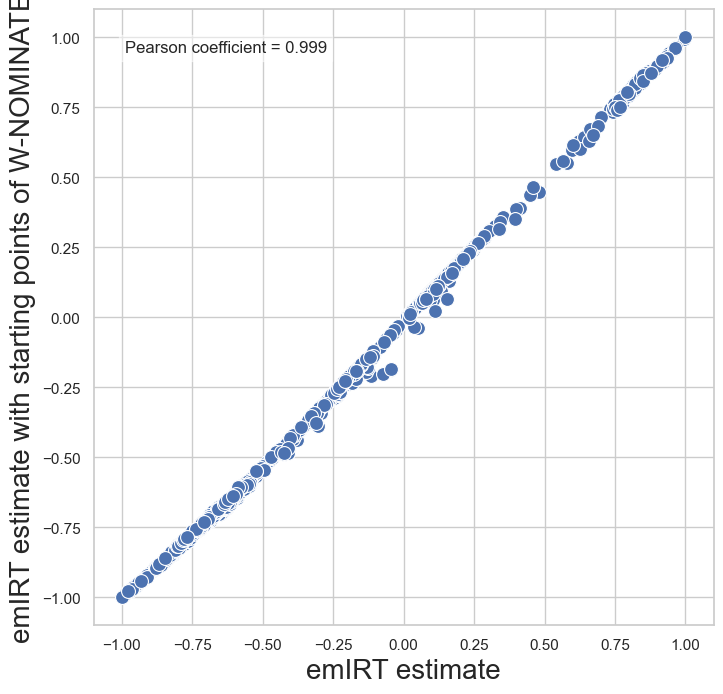

In [192]:
emscatter(avg6_scaled,emIRT6_eigenstarts_scaled,6)

Correlation Coefficient: 0.9355050408391103
P-value: 0.0


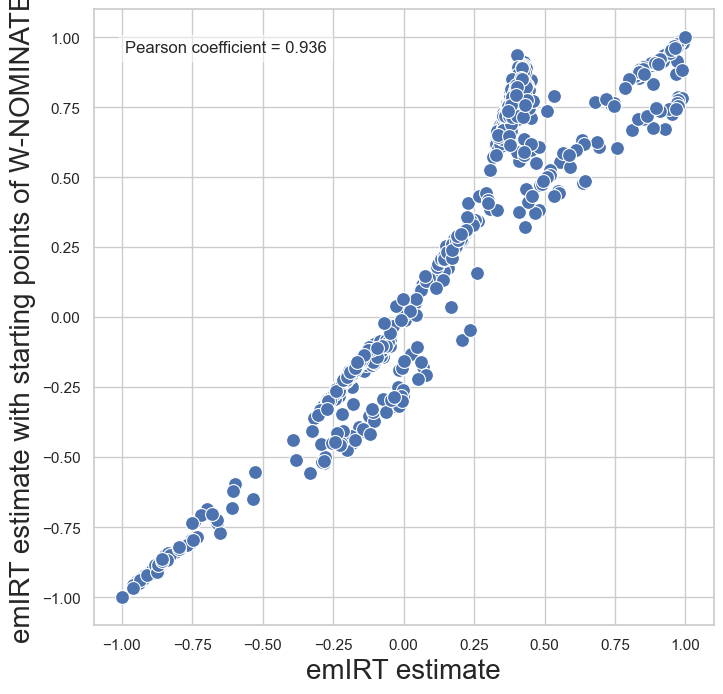

In [193]:
emscatter(avg7_scaled,emIRT7_eigenstarts_scaled,7)


Correlation Coefficient: 0.8404818817449431
P-value: 5.060895983678844e-230


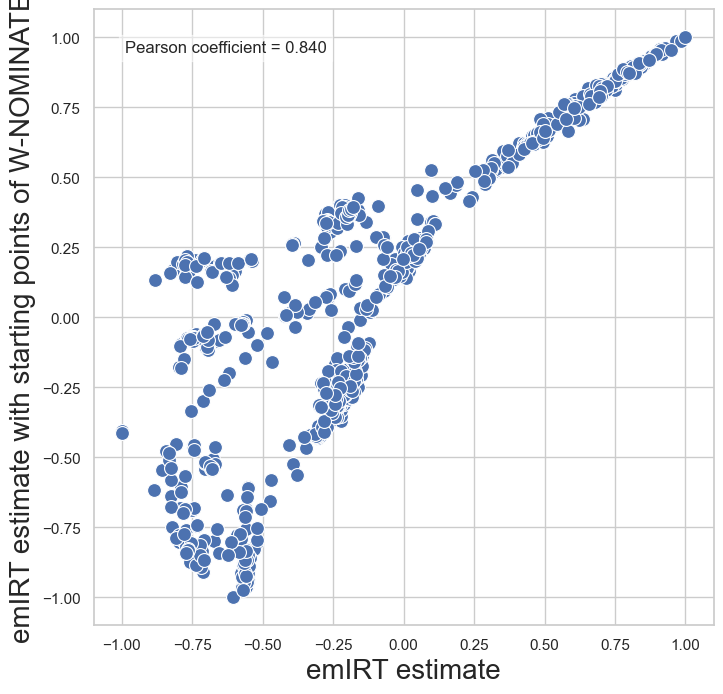

In [194]:
emscatter(avg8_scaled,emIRT8_eigenstarts_scaled,8)


Correlation Coefficient: 0.9982369182298003
P-value: 0.0


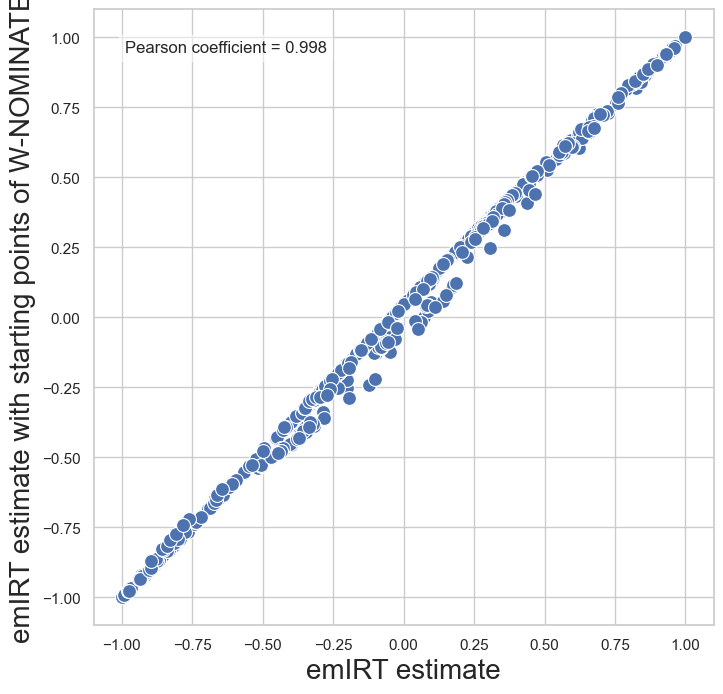

In [195]:
emscatter(avg9_scaled,emIRT9_eigenstarts_scaled,9)


In [196]:
avg9_scaled

MepId  EPG  Average_position   coord1D
0       840   RE          2.558526  0.105107
1      1394   RE         -0.882316 -0.128194
2      1854  S&D          6.723869  0.387531
3      1892  EPP         -1.890346 -0.196541
4      1909  S&D          6.366892  0.363327
..      ...  ...               ...       ...
861  251324  EPP         -3.172786 -0.283495
862  251859   RE          0.431280 -0.039127
863  251874  EPP         -2.785903 -0.257263
864  253008  S&D         -0.314084 -0.089666
865  253043  EPP         -3.112691 -0.279420

[866 rows x 4 columns]

        MepId....names7 EPG....EPG7        d1  y  coord1Dx        EPGx  \
0           Damien ABAD         EPP  0.065917  0  0.360262         EPP   
1            János ÁDER         EPP  0.078064  0  0.398018         EPP   
2     John Stuart AGNEW         EFD  0.262885  0  0.972465         EFD   
3    Gabriele ALBERTINI         EPP  0.081228  0  0.407851         EPP   
4  Jan Philipp ALBRECHT  Greens–EFA -0.324134  0 -0.852065  Greens–EFA   

                  MepId        EPGy  Average_position  coord1Dy  
0           Damien ABAD         EPP          2.253332  0.668235  
1            János ÁDER         EPP          2.649164  0.737452  
2     John Stuart AGNEW         EFD          2.936203  0.787645  
3    Gabriele ALBERTINI         EPP          3.084280  0.813538  
4  Jan Philipp ALBRECHT  Greens–EFA         -6.563521 -0.873514  
EPG: EPP - Correlation Coefficient: 0.6705475400159461
EPG: EPP - P-value: 8.562176196306113e-41


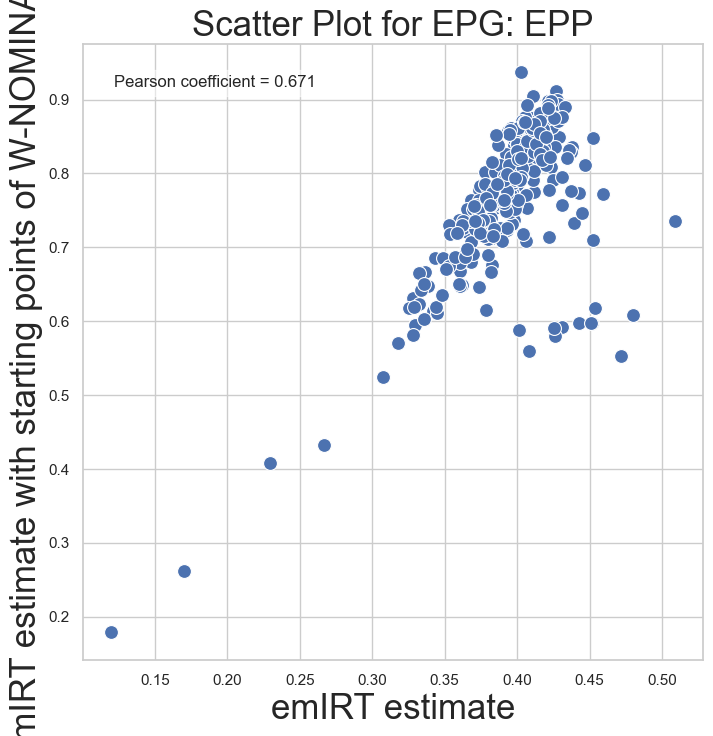

EPG: EFD - Correlation Coefficient: 0.9566181427963159
EPG: EFD - P-value: 3.69340038399368e-18


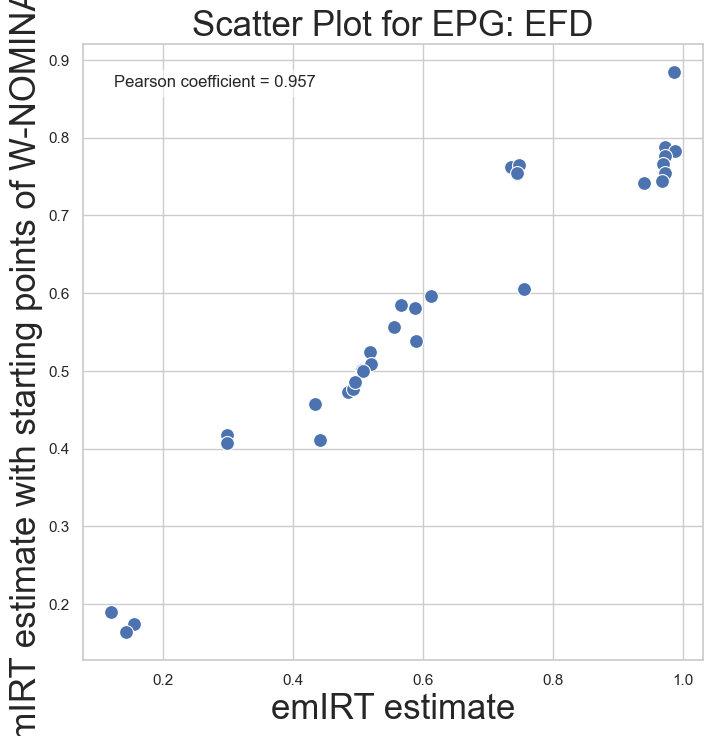

EPG: Greens–EFA - Correlation Coefficient: 0.98606375447947
EPG: Greens–EFA - P-value: 1.417453271038465e-51


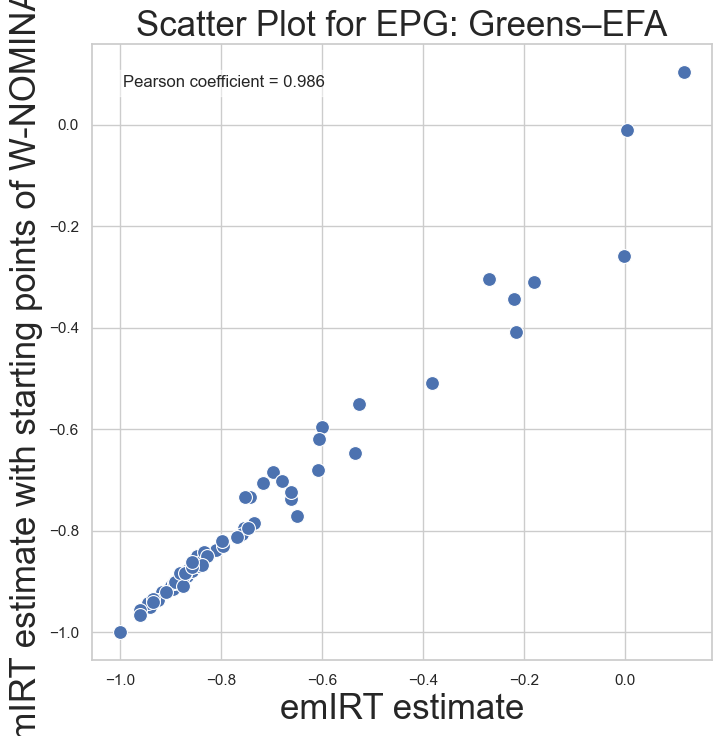

EPG: ALDE - Correlation Coefficient: 0.9918910365013973
EPG: ALDE - P-value: 2.5072212547861284e-83


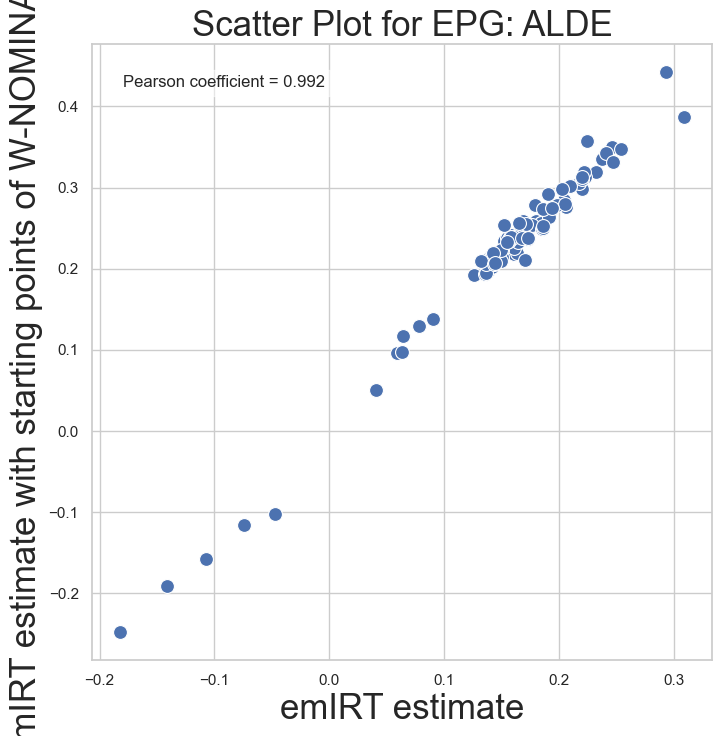

EPG: S&D - Correlation Coefficient: 0.9765347759404699
EPG: S&D - P-value: 2.3567261751324385e-147


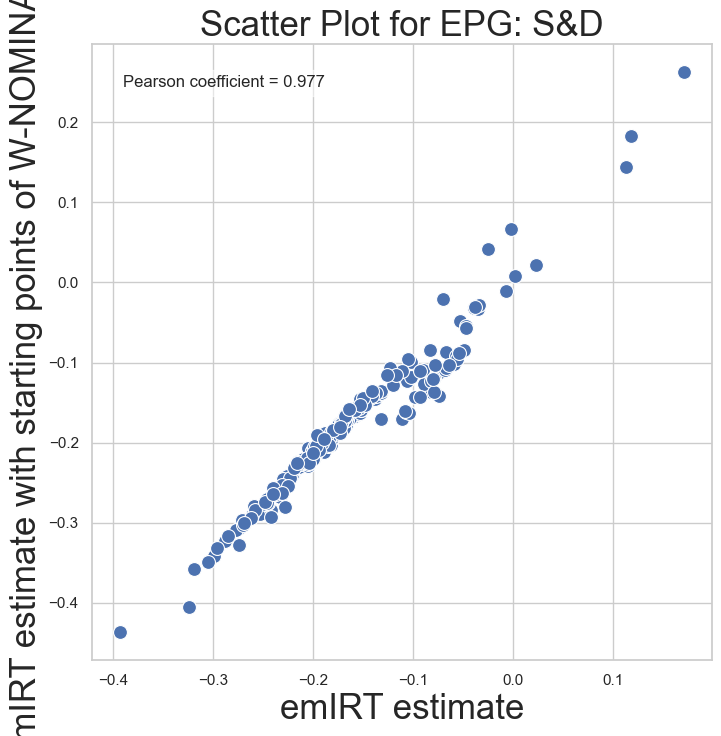

EPG: ECR - Correlation Coefficient: 0.9242225043179357
EPG: ECR - P-value: 1.1670624810066235e-24


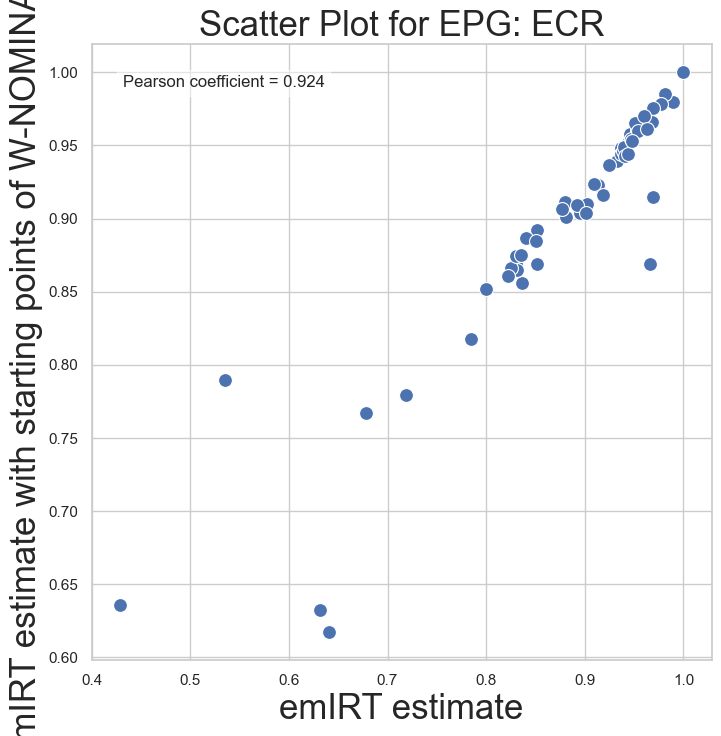

EPG: NI - Correlation Coefficient: 0.9739738868090092
EPG: NI - P-value: 3.76496626117748e-24


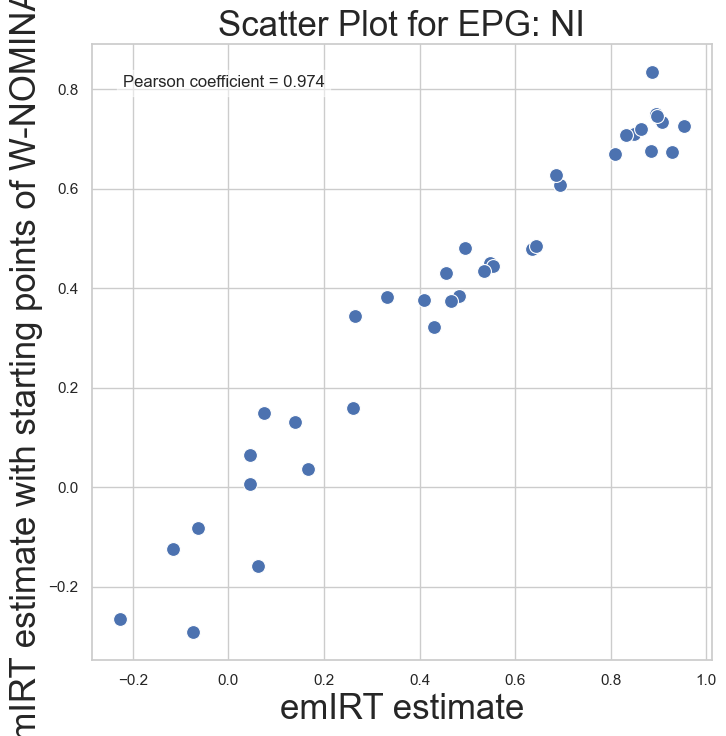

EPG: GUE–NGL - Correlation Coefficient: 0.9174960265614263
EPG: GUE–NGL - P-value: 7.966756993573202e-19


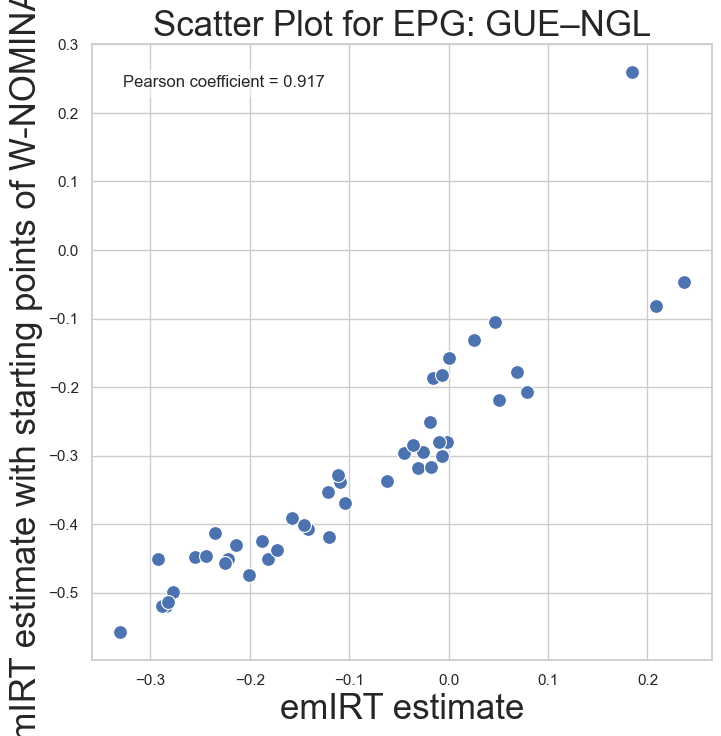

In [247]:
emscatter2(avg7_scaled,emIRT7_eigenstarts_scaled,7)

     MepId....names8 EPG....EPG8        d1  y  coord1Dx        EPGx  \
0    Lars ADAKTUSSON         NaN  0.052976  0  0.100024           0   
1  Isabella ADINOLFI        EFDD -0.147501  0 -0.685696        EFDD   
2     Marco AFFRONTE  Greens–EFA -0.132778  0 -0.627993  Greens–EFA   
3         Laura AGEA        EFDD -0.145481  0 -0.677776        EFDD   
4  John Stuart AGNEW        EFDD -0.161929  0 -0.742241        EFDD   

               MepId        EPGy  Average_position  coord1Dy  
0    Lars ADAKTUSSON         NaN          2.445893  0.432075  
1  Isabella ADINOLFI        EFDD         -4.094120 -0.531684  
2     Marco AFFRONTE  Greens–EFA         -4.801999 -0.636000  
3         Laura AGEA        EFDD         -4.140657 -0.538542  
4  John Stuart AGNEW        EFDD          0.855238  0.197671  
EPG: nan - Correlation Coefficient: 0
EPG: nan - P-value: 0


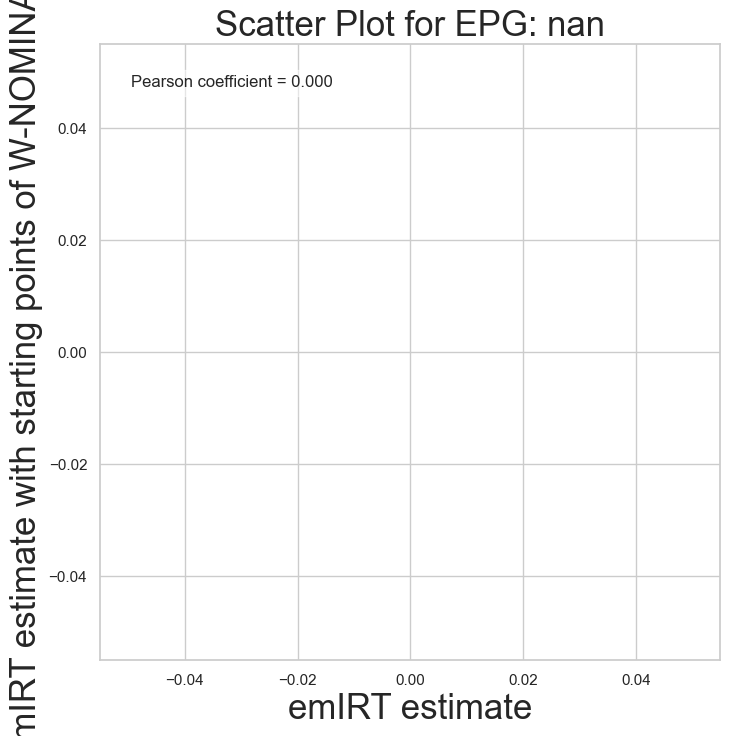

EPG: EFDD - Correlation Coefficient: -0.2504556387004691
EPG: EFDD - P-value: 0.10964989672219752


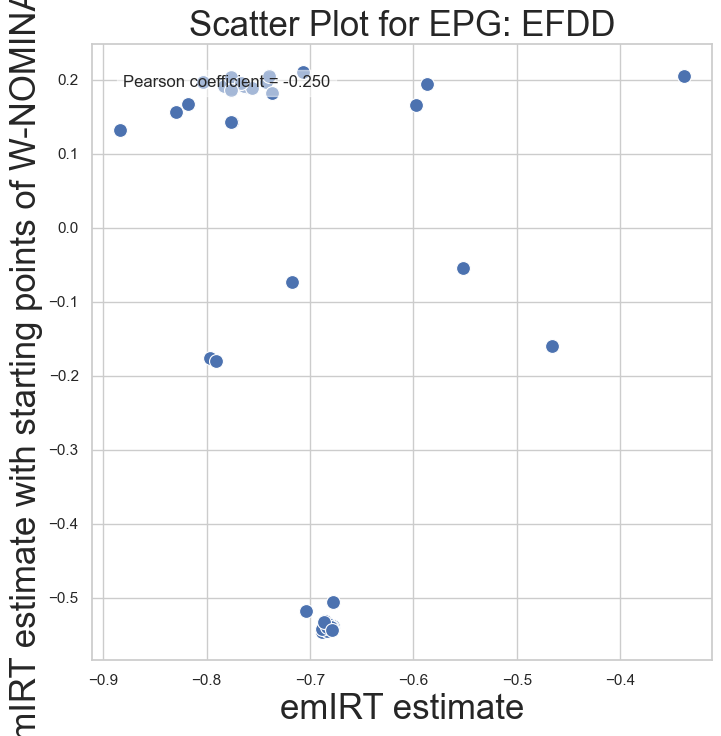

EPG: Greens–EFA - Correlation Coefficient: 0.05690359881896258
EPG: Greens–EFA - P-value: 0.6886500482143327


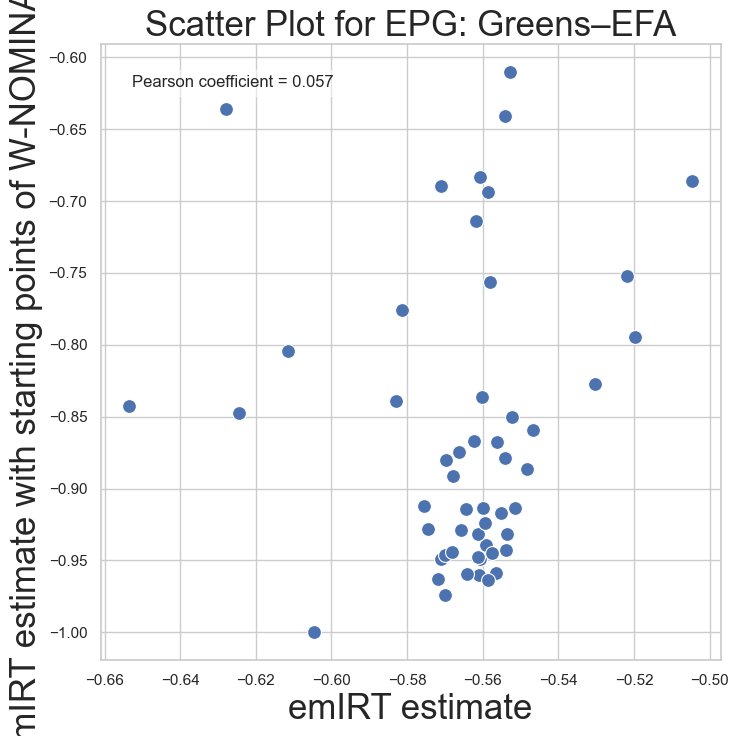

EPG: S&D - Correlation Coefficient: 0.8449946659656704
EPG: S&D - P-value: 1.899367391115636e-52


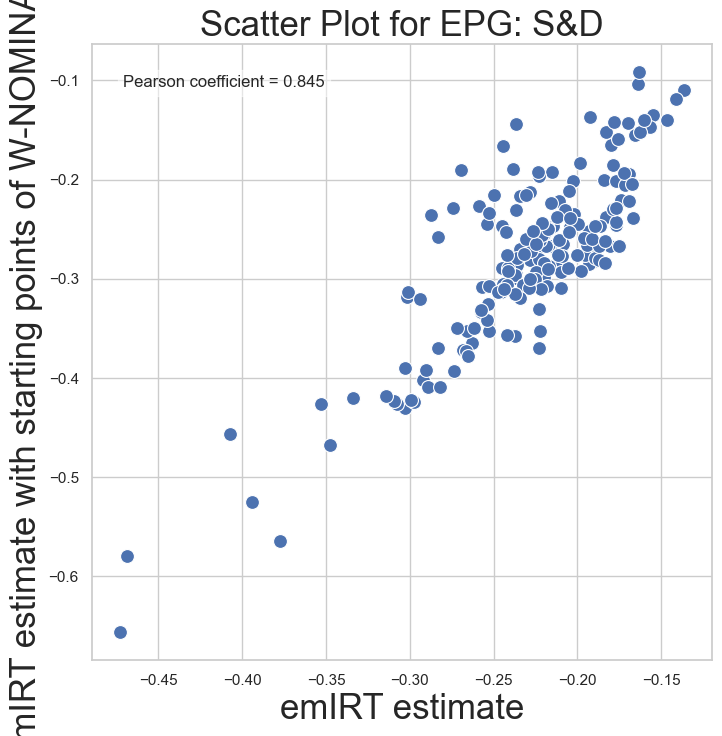

EPG: GUE–NGL - Correlation Coefficient: -0.27630226588175616
EPG: GUE–NGL - P-value: 0.04968472561404575


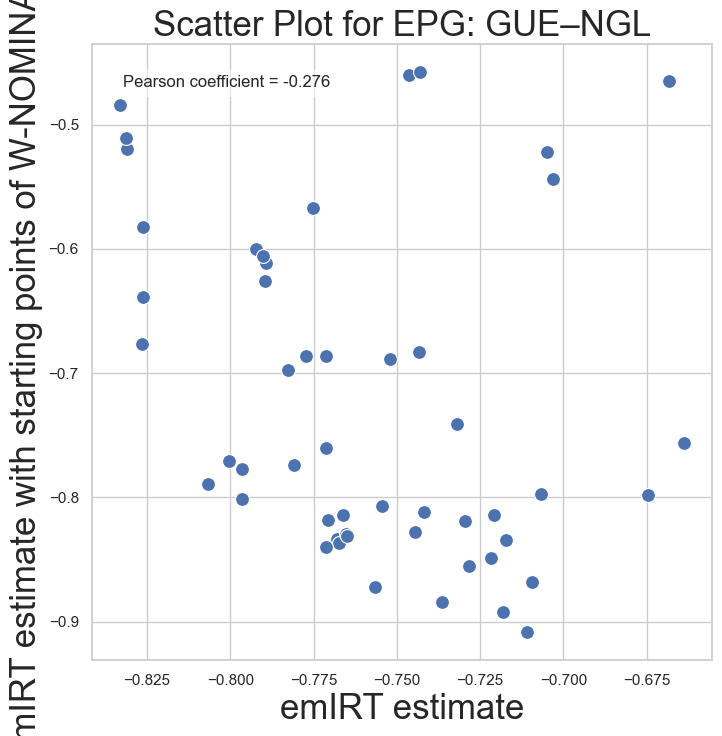

EPG: ALDE - Correlation Coefficient: 0.8657799701037288
EPG: ALDE - P-value: 1.612028064098936e-21


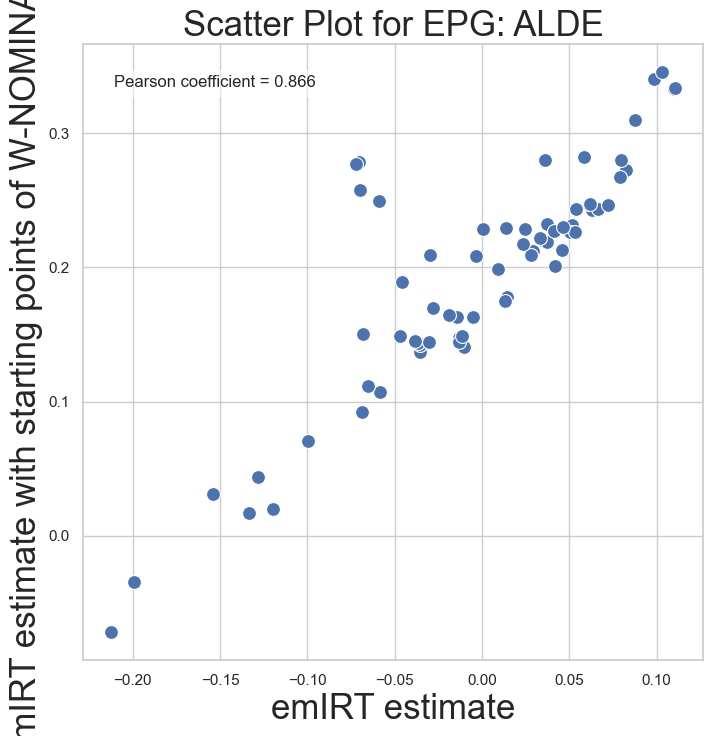

EPG: EPP - Correlation Coefficient: 0.9768685731270107
EPG: EPP - P-value: 2.3595689872689358e-147


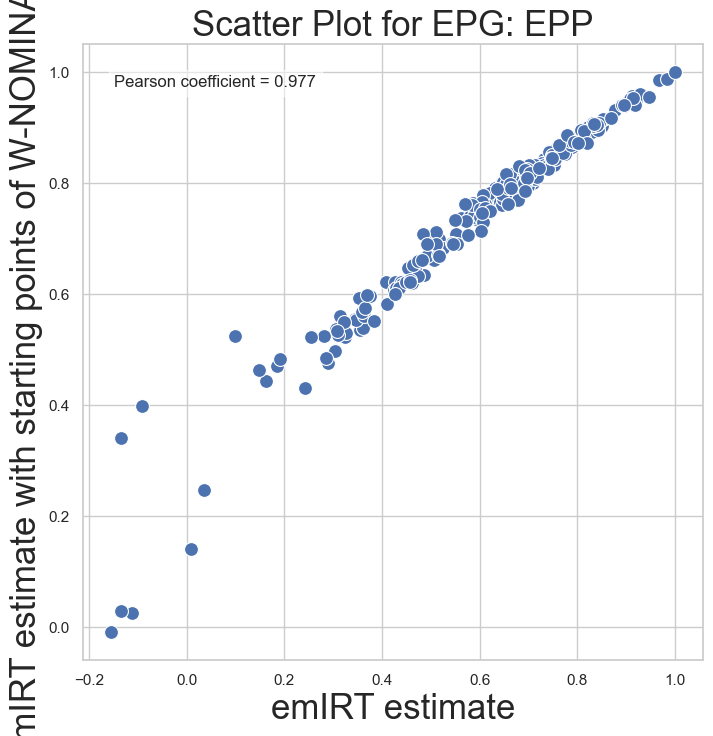

EPG: ENFF - Correlation Coefficient: 0.4163296496905892
EPG: ENFF - P-value: 0.012857442572370233


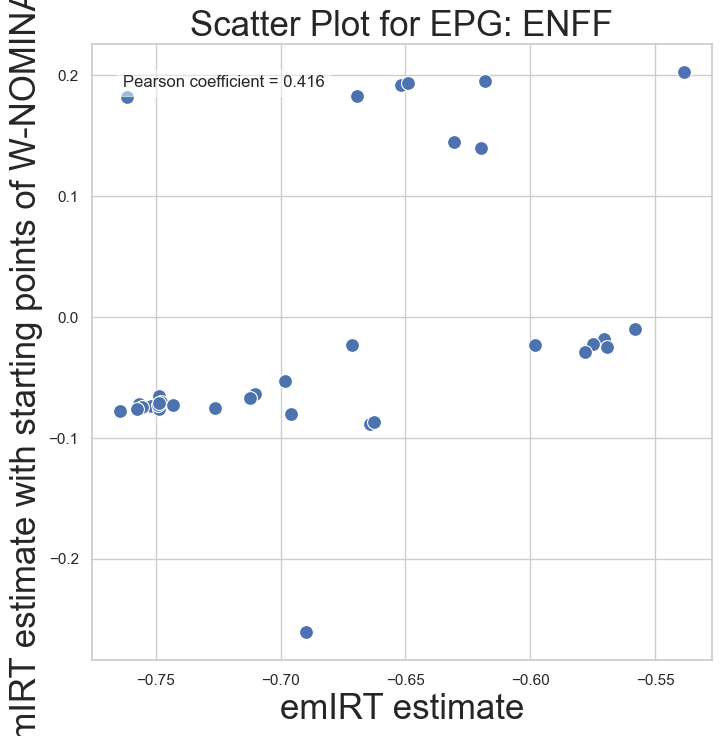

EPG: NI - Correlation Coefficient: 0.6344670570947061
EPG: NI - P-value: 0.001147313553363932


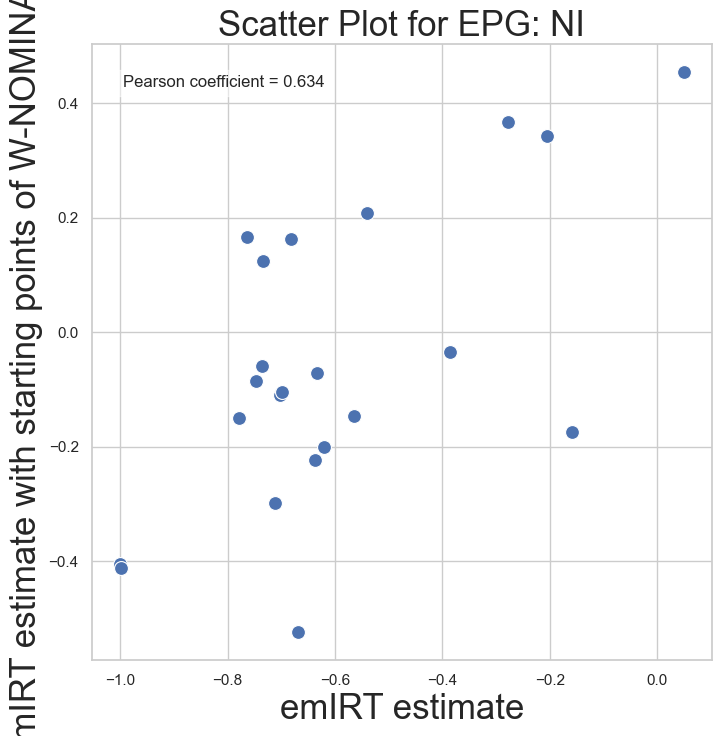

EPG: ECR - Correlation Coefficient: 0.8103745393288487
EPG: ECR - P-value: 3.794447727153949e-18


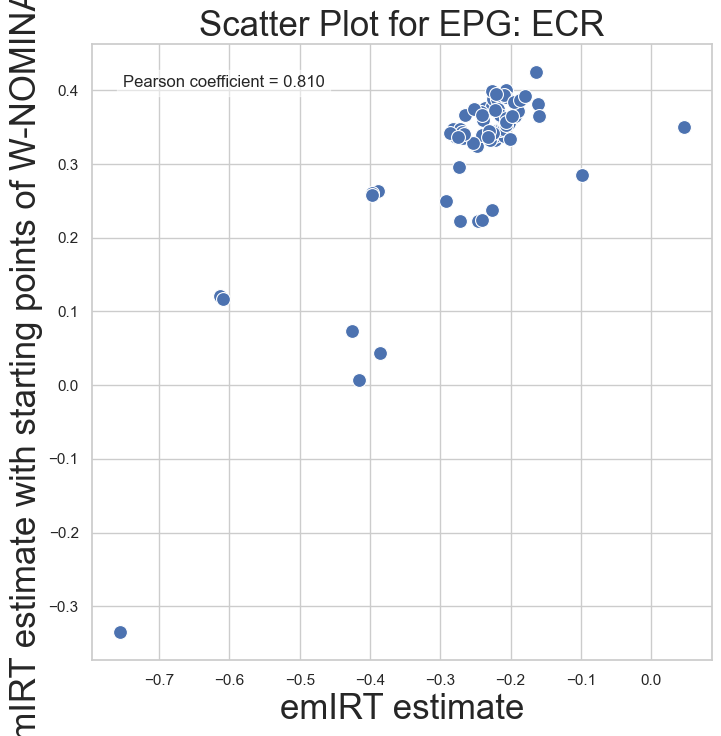

In [259]:
emscatter2(avg8_scaled,emIRT8_eigenstarts_scaled,8)


In [249]:
avg8_scaled


MepId         EPG  Average_position   coord1D
0       Lars ADAKTUSSON         NaN          2.445893  0.432075
1     Isabella ADINOLFI        EFDD         -4.094120 -0.531684
2        Marco AFFRONTE  Greens–EFA         -4.801999 -0.636000
3            Laura AGEA        EFDD         -4.140657 -0.538542
4     John Stuart AGNEW        EFDD          0.855238  0.197671
..                  ...         ...               ...       ...
853  Aleksejs LOSKUTOVS         NaN          3.145643  0.535193
854        Ralph PACKET         NaN          1.244146  0.254982
855    Kārlis ŠADURSKIS         NaN          3.867057  0.641503
856      Bogusław SONIK         NaN          4.034291  0.666147
857      Babette WINTER         NaN         -2.322914 -0.270673

[858 rows x 4 columns]

In [250]:
emIRT8_eigenstarts_scaled

MepId....names8 EPG....EPG8        d1  y   coord1D         EPG
0       Lars ADAKTUSSON         NaN  0.052976  0  0.100024         NaN
1     Isabella ADINOLFI        EFDD -0.147501  0 -0.685696        EFDD
2        Marco AFFRONTE  Greens–EFA -0.132778  0 -0.627993  Greens–EFA
3            Laura AGEA        EFDD -0.145481  0 -0.677776        EFDD
4     John Stuart AGNEW        EFDD -0.161929  0 -0.742241        EFDD
..                  ...         ...       ... ..       ...         ...
853  Aleksejs LOSKUTOVS         NaN  0.121928  0  0.370261         NaN
854        Ralph PACKET         NaN -0.015429  0 -0.168072         NaN
855    Kārlis ŠADURSKIS         NaN  0.153988  0  0.495914         NaN
856      Bogusław SONIK         NaN  0.155572  0  0.502120         NaN
857      Babette WINTER         NaN -0.042454  0 -0.273989         NaN

[858 rows x 6 columns]

In [197]:
def extract_iters_subset (ep,subset):
    file_pattern = f'Results/EP{ep}/EP{ep}_Ideal_points_emIRT_{subset}_Iteration*.csv'
    
    # Use glob to list all files matching the pattern
    file_list = glob.glob(file_pattern)
    
    # Initialize an empty list to hold the DataFrames
    df_list = []
    
    for file in file_list:
        df = pd.read_csv(file)
        df = df['d1']
        
        df_list.append(df)
    
    combined_df = pd.concat(df_list, axis=0)
    
    # Calculate the average across the DataFrames
    average_df = combined_df.groupby(combined_df.index).mean()
    average_df = average_df.reset_index(drop=True)
    average_df = pd.DataFrame(average_df)
    return average_df

In [198]:
avg8_low = extract_iters_subset(8,"low")
avg8_high = extract_iters_subset(8,"high")
avg8_mid = extract_iters_subset(8,"mid")
avg8_ep7 = extract_iters_subset(8,"ep7")

In [199]:
wnominate8_1d_low = pd.read_csv(os.path.join('Results','EP8','wnominate81d_low.csv'))
wnominate8_1d_mid = pd.read_csv(os.path.join('Results','EP8','wnominate81d_mid.csv'))
wnominate8_1d_high = pd.read_csv(os.path.join('Results','EP8','wnominate81d_high.csv'))
wnominate8_1d_ep7 = pd.read_csv(os.path.join('Results','EP8','wnominate81d_ep7.csv'))

In [200]:
avg8_low_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(avg8_low['d1'])))
avg8_mid_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(avg8_mid['d1'])))
avg8_high_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(avg8_high['d1'])))
avg8_ep7_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(avg8_ep7['d1'])))

In [243]:
wnominate_scatter(wnominate8_1d_low,avg8_low_scaled,8)

KeyError: "['EPG'] not found in axis"

In [ ]:
wnominate_scatter(wnominate8_1d_mid,avg8_mid_scaled,8)


In [ ]:
wnominate_scatter(wnominate8_1d_high,avg8_high_scaled,8)


In [ ]:
wnominate_scatter(wnominate8_1d_ep7,avg8_ep7_scaled,8)


In [ ]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnominate8_1d_low, x="coord1D", y=0, hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP8', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

In [ ]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnominate8_1d_mid, x="coord1D", y=0, hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP8', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

In [ ]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnominate8_1d_high, x="coord1D", y=0, hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP8', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

In [ ]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnominate8_1d_ep7, x="coord1D", y=0, hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP8', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

In [ ]:
plt.figure(figsize=(50, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=avg8_ep7_scaled, x="x", y=0, hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP8', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

In [202]:
def load_vote_data(ep):
    df = pd.read_csv(os.path.join('Results', f'votes_plotly_{ep}.csv'))
    epg_counts = df['MepId'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['MepId'].value_counts()
    dataframe = pd.DataFrame()
    dataframe['MepId'] = df['MepId'].unique()
    proportions = epg_4_votes / epg_counts
    dataframe['Proportion'] = proportions
    return proportions.reset_index()


proportions6 = load_vote_data(6)
proportions7 = load_vote_data(7)
proportions8 = load_vote_data(8)
proportions9 = load_vote_data(9)

In [203]:
mepinfo6 = pd.read_csv(os.path.join('Cleaned_data','EP6_clean_data','mep_info_EP_6.csv'))

In [204]:
mepinfo7 = pd.read_csv(os.path.join('Cleaned_data','EP7_clean_data','mep_info_EP_7.csv'))

In [205]:
mepinfo8 = pd.read_csv(os.path.join('Cleaned_data','EP8_clean_data','mep_info_EP_8.csv'))

In [206]:
mepinfo6 = mepinfo6['MepId']

In [207]:
mepinfo7 = mepinfo7['MepId']

In [208]:
mepinfo8 = mepinfo8['MepId']

In [209]:
mepinfo6

0      28469
1      28302
2      28975
3      28367
4      28512
       ...  
935    95280
936    95281
937    95704
938    96101
939    23852
Name: MepId, Length: 940, dtype: int64

In [210]:
proportions8

MepId     count
0       840  0.080960
1      1023  0.738295
2      1037  0.124464
3      1038  0.230979
4      1055  0.300917
..      ...       ...
853  194391  0.014046
854  194658  0.031604
855  195454  0.002926
856  195912  0.026239
857  196042  0.003902

[858 rows x 2 columns]

In [211]:
full6 = wnominate6_1d.join(avg6,lsuffix='_wnom', rsuffix='_avg')

In [212]:
full7 = wnominate7_1d.join(avg7, lsuffix='_wnom', rsuffix='_avg')

In [213]:
full7

EPG_wnom   coord1D                                  MepId     EPG_avg  \
0           EPP -0.005895                            Damien ABAD         EPP   
1           EPP  0.004267                             János ÁDER         EPP   
2           EFD  0.948548                      John Stuart AGNEW         EFD   
3           EPP  0.005754                     Gabriele ALBERTINI         EPP   
4    Greens–EFA -0.278829                   Jan Philipp ALBRECHT  Greens–EFA   
..          ...       ...                                    ...         ...   
848     GUE–NGL -0.990735                        Rina Ronja KARI     GUE–NGL   
849         S&D -0.141905                    Giovanni BARBAGALLO         S&D   
850         EPP -0.006152                        Annette KOEWIUS         EPP   
851         S&D -0.128924                            Katrin SAKS         S&D   
852         S&D -0.131185  Christine REVAULT D'ALLONNES BONNEFOY         S&D   

     Average_position  
0            2.253332  
1            2.649164  
2            2.936203  
3            3.084280  
4           -6.563521  
..                ...  
848         -3.197591  
849         -1.688300  
850          1.948749  
851         -1.331737  
852         -1.187706  

[853 rows x 5 columns]

In [214]:
mepinfo7

0       96850
1       96659
2       96897
3       28367
4       96736
        ...  
848    122885
849    123792
850    123816
851     37200
852    124287
Name: MepId, Length: 853, dtype: int64

In [215]:
full7 = full7.join(mepinfo7, lsuffix='_wnom', rsuffix='_avg')

In [216]:
full7.rename(columns={'MepId_avg':"MepId"},inplace=True)

In [217]:
full7

EPG_wnom   coord1D                             MepId_wnom     EPG_avg  \
0           EPP -0.005895                            Damien ABAD         EPP   
1           EPP  0.004267                             János ÁDER         EPP   
2           EFD  0.948548                      John Stuart AGNEW         EFD   
3           EPP  0.005754                     Gabriele ALBERTINI         EPP   
4    Greens–EFA -0.278829                   Jan Philipp ALBRECHT  Greens–EFA   
..          ...       ...                                    ...         ...   
848     GUE–NGL -0.990735                        Rina Ronja KARI     GUE–NGL   
849         S&D -0.141905                    Giovanni BARBAGALLO         S&D   
850         EPP -0.006152                        Annette KOEWIUS         EPP   
851         S&D -0.128924                            Katrin SAKS         S&D   
852         S&D -0.131185  Christine REVAULT D'ALLONNES BONNEFOY         S&D   

     Average_position   MepId  
0            2.253332   96850  
1            2.649164   96659  
2            2.936203   96897  
3            3.084280   28367  
4           -6.563521   96736  
..                ...     ...  
848         -3.197591  122885  
849         -1.688300  123792  
850          1.948749  123816  
851         -1.331737   37200  
852         -1.187706  124287  

[853 rows x 6 columns]

In [218]:
full8 = wnominate8_1d.join(avg8, lsuffix='_wnom', rsuffix='_avg')

In [219]:
full8 = full8.join(mepinfo8, lsuffix='_wnom')

In [220]:
full6 = pd.merge(full6,proportions6,on='MepId')

In [221]:
full6

EPG_wnom   coord1D  coord2D  MepId  EPG_avg  Average_position     count
0    GUE–NGL  0.932075        0  28469  GUE–NGL          7.789021  0.293918
1    IND/DEM -0.503672        0  28302  IND/DEM          0.351206  0.027101
2    GUE–NGL  0.987876        0  28975  GUE–NGL          8.936521  0.183578
3     EPP-ED -0.494342        0  28367   EPP-ED         -3.838777  0.124052
4         NI -0.898972        0  28512       NI         -1.596996  0.171641
..       ...       ...      ...    ...      ...               ...       ...
935      PES  0.069961        0  95280      PES          2.084978  0.033231
936      PES  0.101599        0  95281      PES          2.363334  0.028714
937   EPP-ED -0.528945        0  95704   EPP-ED         -3.078250  0.020003
938   EPP-ED -0.517884        0  96101   EPP-ED         -1.828385  0.038071
939   EPP-ED -0.545434        0  23852   EPP-ED         -1.947953  0.063236

[940 rows x 7 columns]

In [222]:
full7 = pd.merge(full7,proportions7,on='MepId')

In [223]:
full8

EPG_wnom   coord1D          MepId_wnom     EPG_avg  Average_position  \
0             0  0.044779     Lars ADAKTUSSON         NaN          2.445893   
1          EFDD -0.862034   Isabella ADINOLFI        EFDD         -4.094120   
2    Greens–EFA -0.662883      Marco AFFRONTE  Greens–EFA         -4.801999   
3          EFDD -0.854416          Laura AGEA        EFDD         -4.140657   
4          EFDD  0.916955   John Stuart AGNEW        EFDD          0.855238   
..          ...       ...                 ...         ...               ...   
853           0  0.025856  Aleksejs LOSKUTOVS         NaN          3.145643   
854           0  0.058998        Ralph PACKET         NaN          1.244146   
855           0  0.032209    Kārlis ŠADURSKIS         NaN          3.867057   
856           0  0.041783      Bogusław SONIK         NaN          4.034291   
857           0 -0.163342      Babette WINTER         NaN         -2.322914   

      MepId  
0    124990  
1    124831  
2    124797  
3    124811  
4     96897  
..      ...  
853  196042  
854  195454  
855  111033  
856   28299  
857  195912  

[858 rows x 6 columns]

In [224]:
full8 = pd.merge(full8,proportions8,on='MepId')

In [225]:
full8

EPG_wnom   coord1D          MepId_wnom     EPG_avg  Average_position  \
0             0  0.044779     Lars ADAKTUSSON         NaN          2.445893   
1          EFDD -0.862034   Isabella ADINOLFI        EFDD         -4.094120   
2    Greens–EFA -0.662883      Marco AFFRONTE  Greens–EFA         -4.801999   
3          EFDD -0.854416          Laura AGEA        EFDD         -4.140657   
4          EFDD  0.916955   John Stuart AGNEW        EFDD          0.855238   
..          ...       ...                 ...         ...               ...   
853           0  0.025856  Aleksejs LOSKUTOVS         NaN          3.145643   
854           0  0.058998        Ralph PACKET         NaN          1.244146   
855           0  0.032209    Kārlis ŠADURSKIS         NaN          3.867057   
856           0  0.041783      Bogusław SONIK         NaN          4.034291   
857           0 -0.163342      Babette WINTER         NaN         -2.322914   

      MepId     count  
0    124990  0.115002  
1    124831  0.099103  
2    124797  0.169918  
3    124811  0.136851  
4     96897  0.090031  
..      ...       ...  
853  196042  0.003902  
854  195454  0.002926  
855  111033  0.023117  
856   28299  0.019899  
857  195912  0.026239  

[858 rows x 7 columns]

In [226]:
full6['Average_position_scaled'] = scaler.fit_transform(pd.DataFrame(full6['Average_position']))

In [227]:
full6

EPG_wnom   coord1D  coord2D  MepId  EPG_avg  Average_position     count  \
0    GUE–NGL  0.932075        0  28469  GUE–NGL          7.789021  0.293918   
1    IND/DEM -0.503672        0  28302  IND/DEM          0.351206  0.027101   
2    GUE–NGL  0.987876        0  28975  GUE–NGL          8.936521  0.183578   
3     EPP-ED -0.494342        0  28367   EPP-ED         -3.838777  0.124052   
4         NI -0.898972        0  28512       NI         -1.596996  0.171641   
..       ...       ...      ...    ...      ...               ...       ...   
935      PES  0.069961        0  95280      PES          2.084978  0.033231   
936      PES  0.101599        0  95281      PES          2.363334  0.028714   
937   EPP-ED -0.528945        0  95704   EPP-ED         -3.078250  0.020003   
938   EPP-ED -0.517884        0  96101   EPP-ED         -1.828385  0.038071   
939   EPP-ED -0.545434        0  23852   EPP-ED         -1.947953  0.063236   

     Average_position_scaled  
0                   0.837197  
1                  -0.171589  
2                   0.992831  
3                  -0.739873  
4                  -0.435822  
..                       ...  
935                 0.063561  
936                 0.101315  
937                -0.636723  
938                -0.467205  
939                -0.483422  

[940 rows x 8 columns]

In [228]:
full8['Average_position_scaled'] = scaler.fit_transform(pd.DataFrame(full8['Average_position']))


In [229]:
full7['Average_position_scaled'] = scaler.fit_transform(pd.DataFrame(full7['Average_position']))


In [230]:
full7

EPG_wnom   coord1D                             MepId_wnom     EPG_avg  \
0           EPP -0.005895                            Damien ABAD         EPP   
1           EPP  0.004267                             János ÁDER         EPP   
2           EFD  0.948548                      John Stuart AGNEW         EFD   
3           EPP  0.005754                     Gabriele ALBERTINI         EPP   
4    Greens–EFA -0.278829                   Jan Philipp ALBRECHT  Greens–EFA   
..          ...       ...                                    ...         ...   
848     GUE–NGL -0.990735                        Rina Ronja KARI     GUE–NGL   
849         S&D -0.141905                    Giovanni BARBAGALLO         S&D   
850         EPP -0.006152                        Annette KOEWIUS         EPP   
851         S&D -0.128924                            Katrin SAKS         S&D   
852         S&D -0.131185  Christine REVAULT D'ALLONNES BONNEFOY         S&D   

     Average_position   MepId     count  Average_position_scaled  
0            2.253332   96850  0.090648                 0.668235  
1            2.649164   96659  0.020687                 0.737452  
2            2.936203   96897  0.081310                 0.787645  
3            3.084280   28367  0.107887                 0.813538  
4           -6.563521   96736  0.106163                -0.873514  
..                ...     ...       ...                      ...  
848         -3.197591  122885  0.009338                -0.284934  
849         -1.688300  123792  0.062922                -0.021014  
850          1.948749  123816  0.012211                 0.614975  
851         -1.331737   37200  0.002586                 0.041336  
852         -1.187706  124287  0.027439                 0.066522  

[853 rows x 8 columns]

In [231]:
full6['Absolute_difference'] = (full6['coord1D'] - full7['Average_position_scaled']).abs()

In [232]:
full7['Absolute_difference'] = (full7['coord1D'] - full6['Average_position_scaled']).abs()

In [233]:
full8['Absolute_difference'] = (full8['coord1D'] - full6['Average_position_scaled']).abs()

<Figure size 1000x1000 with 0 Axes>

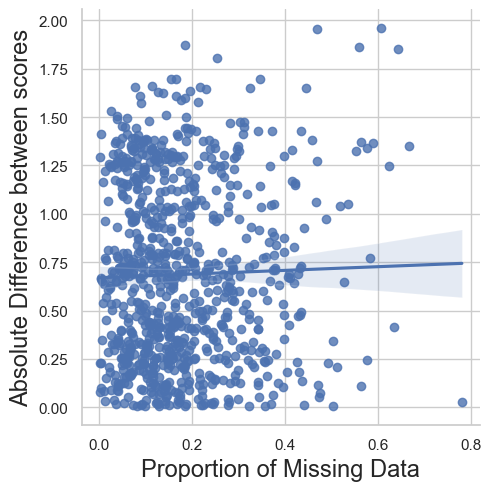

In [270]:
plt.figure(figsize=(10, 10))
sns.lmplot(data=full6, x='count', y='Absolute_difference')

# Add labels and title for clarity
plt.xlabel("Proportion of Missing Data",fontsize=17)
plt.ylabel("Absolute Difference between scores",fontsize=17)
plt.savefig(os.path.join("Graphs","missingvsdiff6.png"),dpi=300)
# Show plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

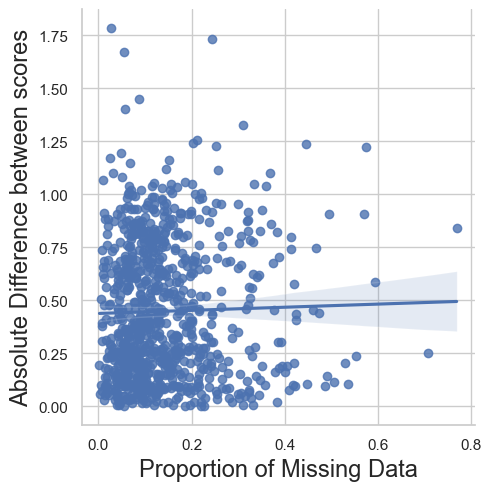

In [271]:
plt.figure(figsize=(10, 10))
sns.lmplot(data=full7, x='count', y='Absolute_difference')

# Add labels and title for clarity
plt.xlabel("Proportion of Missing Data",fontsize=17)
plt.ylabel("Absolute Difference between scores",fontsize=17)
plt.savefig(os.path.join("Graphs","missingvsdiff7.png"),dpi=300)

# Show plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

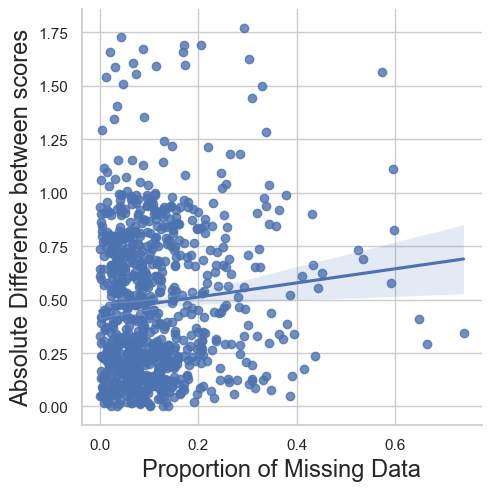

In [272]:
plt.figure(figsize=(10, 10))
sns.lmplot(data=full8, x='count', y='Absolute_difference')

# Add labels and title for clarity
plt.xlabel("Proportion of Missing Data",fontsize=17)
plt.ylabel("Absolute Difference between scores",fontsize=17)
plt.savefig(os.path.join("Graphs","missingvsdiff8.png"),dpi=300)

# Show plot
plt.show()

In [239]:
em7 = pd.read_csv(os.path.join('Results','EP7','EP7_Ideal_points_emIRT_Iteration1.csv'))

In [240]:
em8 = pd.read_csv(os.path.join('Results','EP8','EP8_Ideal_points_emIRT_Iteration1.csv'))

In [242]:
em7

MepId....names7 EPG....EPG7        d1  y
0                              Damien ABAD         EPP  3.287716  0
1                               János ÁDER         EPP  3.907852  0
2                        John Stuart AGNEW         EFD -3.458145  0
3                       Gabriele ALBERTINI         EPP  5.019027  0
4                     Jan Philipp ALBRECHT  Greens–EFA -5.752650  0
..                                     ...         ...       ... ..
848                        Rina Ronja KARI     GUE–NGL -7.106764  0
849                    Giovanni BARBAGALLO         S&D -2.036540  0
850                        Annette KOEWIUS         EPP  2.764228  0
851                            Katrin SAKS         S&D -1.681021  0
852  Christine REVAULT D'ALLONNES BONNEFOY         S&D -1.945610  0

[853 rows x 4 columns]

In [241]:
plt.figure(figsize=(10, 6))
sns.scatterplot( x=em7['d1'], y=)

# Add labels and title for clarity
plt.xlabel("Proportion of Missing Data")
plt.ylabel("Absolute Difference between Columns")
plt.title("Relationship between Missing Data Proportion and Absolute Column Difference")
sns.lmplot(data=full8, x='Absolute_difference', y='count', aspect=1.5)
# Show plot
plt.show()

ValueError: Could not interpret value `` for `y`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [ ]:
plotdata7 = pd.DataFrame()
plotdata7['d1'] = em7['d1']
plotdata7['coord1D'] = wnominate7_1d.coord1D
plotdata7['d1'] = scaler.fit_transform(pd.DataFrame(plotdata7['d1']))

In [ ]:
plotdata8 = pd.DataFrame()
plotdata8['d1'] = em8['d1']
plotdata8['coord1D'] = wnominate8_1d.coord1D
plotdata8['d1'] = scaler.fit_transform(pd.DataFrame(plotdata8['d1']))

In [ ]:
sns.lmplot(data=plotdata7, x='d1', y='coord1D', aspect=1.5)


In [ ]:
sns.lmplot(data=plotdata8, x='d1', y='coord1D', aspect=1.5)
